<a href="https://colab.research.google.com/github/YadavTarle/Energy_Price_Forcasting/blob/main/Energy_Price_Forecasting_Yadav_Tarle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Electricity Price Forecasting Based on Energy Demand, Generation, and Weather Parameters



##### **Project Type**    - This is a regression problem where the target variable (electricity prices) is continuous. The project will involve data preprocessing, exploratory data analysis (EDA), feature engineering, and building predictive models using machine learning algorithms.

##### **Contribution**    - Yadav Tarle


# **Project Summary -**

* The goal of this project was to develop an effective predictive model for hourly electricity prices using historical data. Given the complex interplay of factors affecting electricity prices, including demand, generation, and weather conditions, this project aimed to leverage machine learning algorithms to enhance forecasting accuracy. The dataset included variables from multiple cities, such as Barcelona, Bilbao, Madrid, Seville, and Valencia, encompassing electricity generation, actual load, day-ahead and actual prices, and weather parameters.

* Data Preparation

  The project began with data wrangling, which involved cleaning and preprocessing the dataset to ensure consistency and quality. This process included handling missing values, normalizing data. Exploratory Data Analysis (EDA) was conducted to identify trends, seasonality, and correlations among variables, utilizing visualizations like time series plots and heatmaps to derive insights.

* Modeling Approaches

  Three distinct machine learning models were developed and evaluated:

1. LSTM (Long Short-Term Memory)

2. XGBoost

3. Encoder-Decoder Model


* Model Evaluation

  The models were evaluated primarily using RMSE, which measures the differences between predicted and actual values. Lower RMSE values indicate better performance, essential for financial forecasting where accuracy is critical. Visualizations comparing predicted and actual electricity prices illustrated the strong performance of the LSTM and XGBoost models.

* Conclusion and Future Work

  The project successfully identified the XGBoost model as the most effective for forecasting electricity prices, followed by the LSTM model after hyperparameter tuning. The results confirm that machine learning can significantly improve forecasting accuracy in the energy sector. Future work could involve refining the Encoder-Decoder model and implementing ensemble methods to enhance performance further.

* To facilitate deployment, the best-performing XGBoost model was saved in joblib format for integration into production systems. This project underscores the potential of machine learning in energy forecasting, paving the way for advancements in predictive analytics within the energy market.

# **GitHub Link -**




https://github.com/YadavTarle


# **Problem Statement**


**The task is to forecast electricity prices on an hourly basis using historical data of energy demand, energy generation from various sources (fossil fuels, renewable energy, etc.), and weather conditions (such as temperature, humidity, wind speed, etc.). Accurate electricity price forecasting is critical for energy market operations, supply chain management, and efficient grid operations. By analyzing the relationship between weather, energy generation, and energy demand, this project aims to build a model that can predict future electricity prices.**

# ***Let's Begin !***

## ***1. Knowing our Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import ttest_rel
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import tensorflow as tf
import xgboost as xgb
import os
!pip install joblib
import joblib
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install keras-tuner --upgrade
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from kerastuner import HyperModel, RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, TimeDistributed, Flatten, Dropout, RepeatVector
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from math import sqrt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
# 1 energy dataset
shared_link = 'https://drive.google.com/file/d/1j38-6YLear4j_11Nt-Kza-5D_-CZo_WO/view?usp=drive_link'
file_id = shared_link.split('/')[-2]
download_url = f'https://drive.google.com/uc?id={file_id}'
df_energy = pd.read_csv(download_url)

# 2 Weather dataset
shared_link = 'https://drive.google.com/file/d/1XBPQ2EGg2zCsrpFlYe_yxZJsIfCcHnZe/view?usp=drive_link'
file_id = shared_link.split('/')[-2]
download_url = f'https://drive.google.com/uc?id={file_id}'
df_weather  = pd.read_csv(download_url)

### Dataset First View

In [ ]:
# Energy Dataset First Look
df_energy.head(2)

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   

   price day ahead  price actual  
0             50.1         65.41  
1             48.1         64.92  

[2 rows x 29 columns]

In [ ]:
# Weather Dataset first look
df_weather.head(2)

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0         800        clear        sky is clear          01n  
1         800        clear        sky is clear          01n

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Energy dataset contains rows and columns')
df_energy.shape

Energy dataset contains rows and columns


(35064, 29)

In [ ]:
print('Weather features dataset contains rows and columns')
df_weather.shape

Weather features dataset contains rows and columns


(178396, 17)

### Dataset Information

In [ ]:
# Dataset Info
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(r'Energy dataset contains duplicate values')
df_energy.duplicated().sum()

Energy dataset contains duplicate values


0

In [ ]:
# Dataset Duplicate Value Count
print(r'Weather features dataset contains duplicate values')
df_weather.duplicated().sum()

Weather features dataset contains duplicate values


21

#### Missing Values/Null Values

In [ ]:
# Dataset Missing Value Count

print('There are {} missing values or NaNs in df_energy.'
      .format(df_energy.isnull().values.sum()))

There are 70529 missing values or NaNs in df_energy.


In [ ]:
# Dataset Missing Value Count

print(r'Weather features dataset contains missing values')
df_weather.isnull().sum()

Weather features dataset contains missing values


dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [ ]:
print('There are {} missing values or NaNs in df_weather.'
      .format(df_weather.isnull().values.sum()))

There are 0 missing values or NaNs in df_weather.


*  We will drop all the columns that are constituted by zeroes and NaNs, as they are unusable. We will also remove the columns which will not be used at all in our analysis and which contain day-ahead forecasts for the total load, the solar energy and the wind energy.

* Here's why it's a good approach:

1. Unusable Data: Columns with only zeroes or NaNs do not contribute to the analysis.
2. Forecast Columns: Since the focus is on forecasting electricity prices based on actual generation, demand, and weather conditions, forecasted values (like day-ahead forecasts) may introduce noise and redundancy.

In [ ]:
# Droping unusable columns
df_energy = df_energy.drop(['generation fossil coal-derived gas','generation fossil oil shale',
                            'generation fossil peat', 'generation geothermal',
                            'generation hydro pumped storage aggregated', 'generation marine',
                            'generation wind offshore', 'forecast wind offshore eday ahead',
                            'total load forecast', 'forecast solar day ahead',
                            'forecast wind onshore day ahead'],
                            axis=1)
df_energy.shape

(35064, 18)

### What did we know about our dataset?

* The dataset consists of two primary sources: energy generation data and weather features data, both providing hourly records.

1. Energy Dataset:

  Shape: 35,064 rows and 29 columns.

* Key Attributes:
  Contains details of energy generation from various sources like biomass, fossil fuels, geothermal, hydro, solar, wind, etc.

  It includes columns for total load (forecasted and actual), as well as electricity prices (day ahead and actual).

  Some columns contain missing values and irrelevant information, such as day-ahead forecasts for energy generation.

  A few columns contain zero values throughout, rendering them unusable for analysis.

2. Weather Dataset:

  Shape: 178,396 rows and 17 columns.

  Key Attributes:
  Includes hourly weather data for the city of Valencia with attributes such as temperature, pressure, humidity, wind speed, wind direction, rainfall, and cloudiness.

  Each weather condition is associated with a specific timestamp (dt_iso) and includes descriptors like "clear sky" or "rain."

  There are some duplicate values present in this dataset, which will need to be cleaned.
* Summary:
The datasets provide rich historical data on energy generation, consumption, and weather conditions. However, there are missing values, redundant columns, and irrelevant forecast data that need to be handled before analysis.

## ***2. Understanding Variables In Dataset***

In [ ]:
# Dataset Columns
df_energy.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual'],
      dtype='object')

In [ ]:
# Dataset Columns

df_weather.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

## 3. ***Data Wrangling***

### Data Wrangling Code

Data Wrangling in Energy Dataset

The 'time' column has been incorrectly processed and is regarded as an object. We also want this column to serve as the index of the observations in a time-series.

In [ ]:
# Converting time to datetime object and setting it as index
df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True, infer_datetime_format=True)
df_energy = df_energy.set_index('time')

As we can see above, df_energy contains no duplicate values. Nonetheless, it contains some NaNs, so we must look deeper. Because this is a time-series forecasting work, we cannot simply discard the rows with missing data; instead, we need use interpolation to fill in the gaps.

In [ ]:
# Missing Values/Null Values Count
print('Energy dataset contains missing values')
df_energy.isnull().sum()

Energy dataset contains missing values


generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

The 'total load actual' column contains the vast majority of null entries. As a result, it is a good idea to imagine it and see what we can accomplish. Let's start by defining a plot function that we'll use to view the 'total load actual' column and other columns.

In [ ]:
# Define a function to plot different types of time-series
def plot_series(df=None, column=None, series=pd.Series([]),
                label=None, ylabel=None, title=None, start=0, end=None):
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

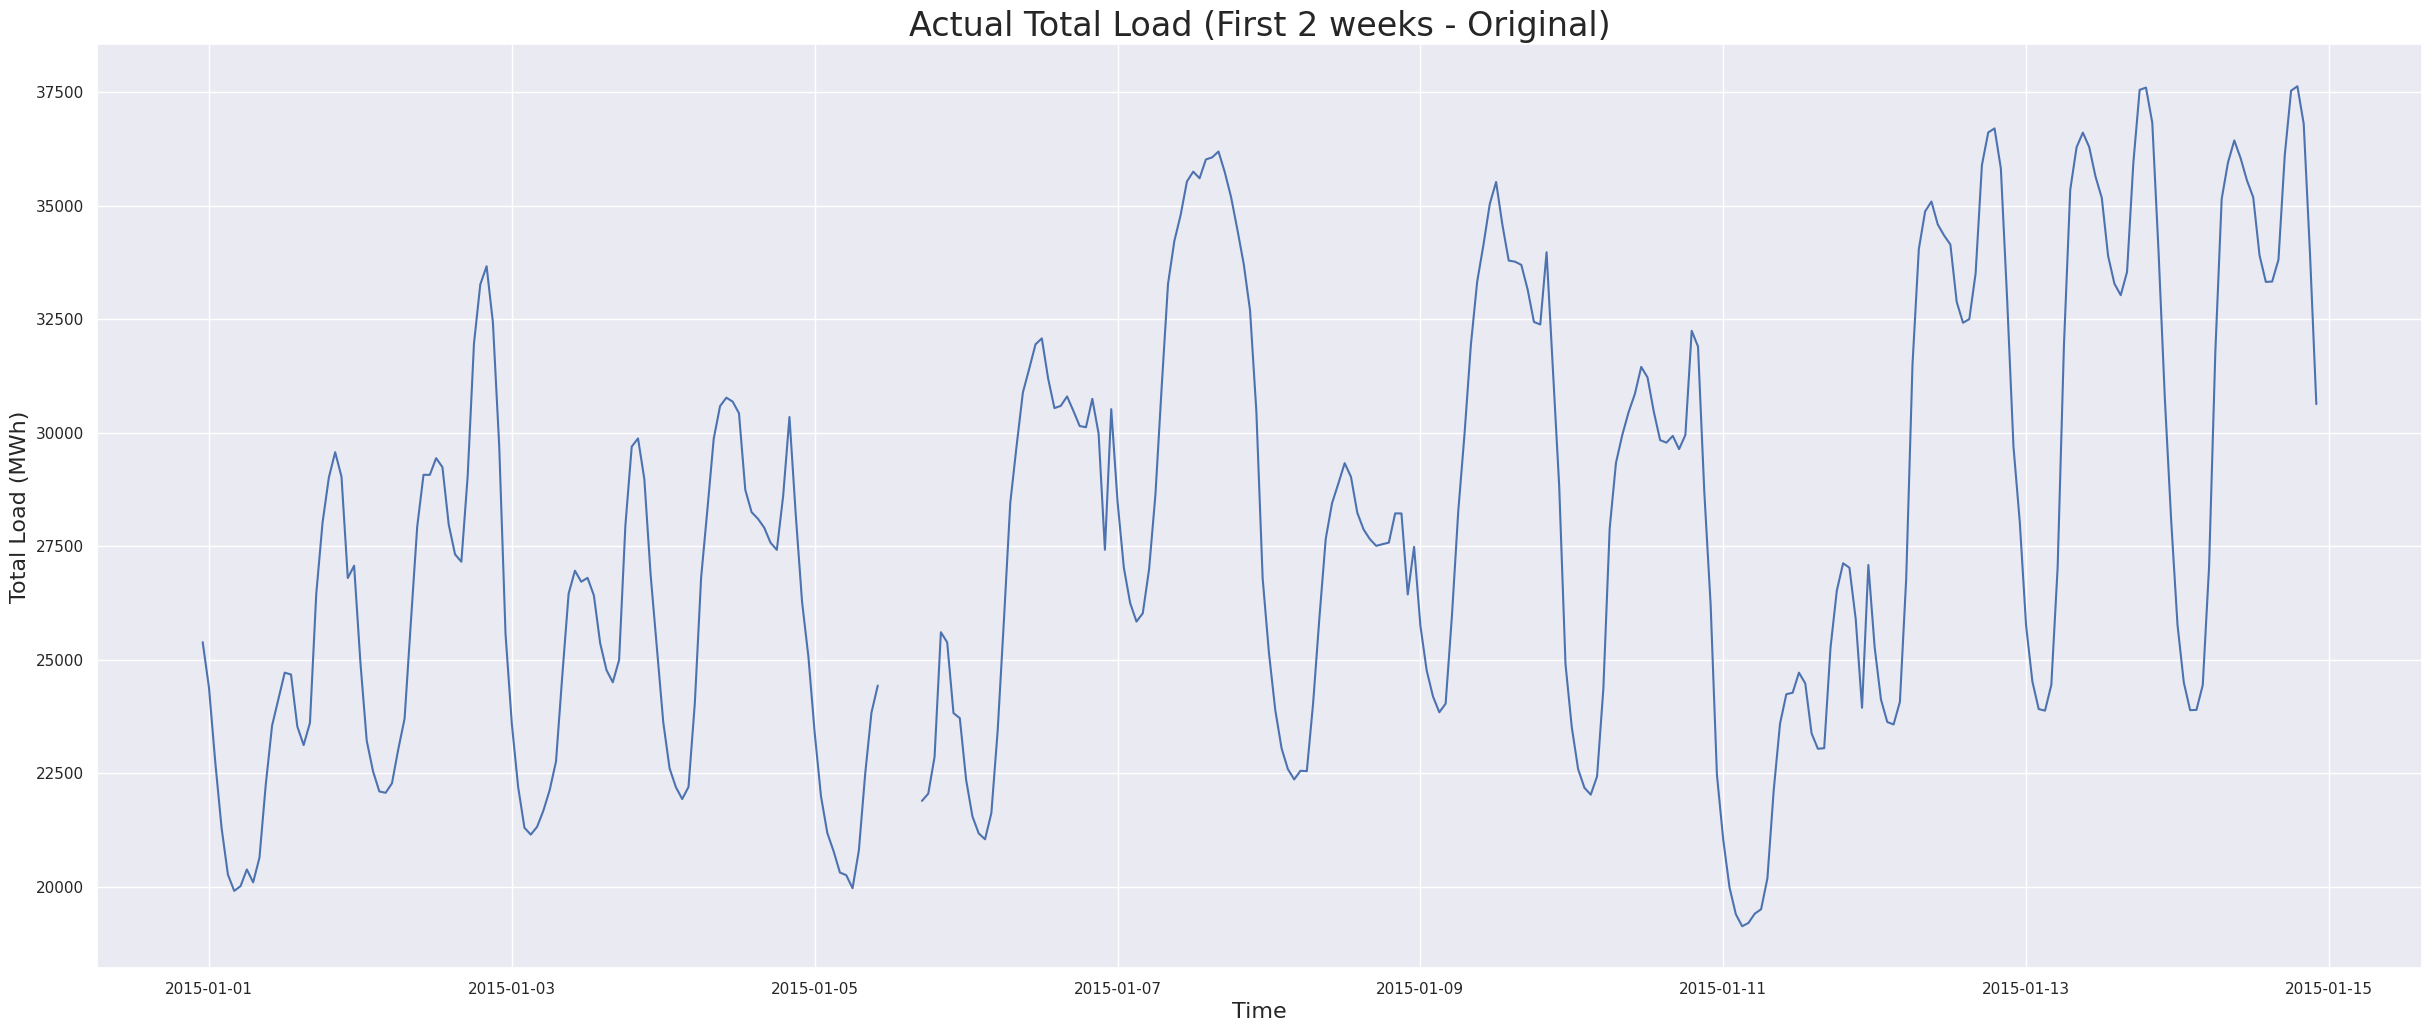

In [ ]:
# Zoom into the plot of the hourly total load
ax = plot_series(df=df_energy, column='total load actual', ylabel='Total Load (MWh)',
                 title='Actual Total Load (First 2 weeks - Original)', end=24*7*2)
plt.show()

After zooming in on the first two weeks of the 'total load actual' column, we can see that there are null values for a few hours. However, based on the amount of missing data and the series' behavior, interpolation would effectively fill the NaNs. Let's see if the null values in the different columns match. Let's show some last rows.

In [ ]:
df_energy[df_energy.isnull().any(axis=1)].tail(3)

generation biomass  \
time                                            
2017-11-14 18:00:00+00:00                 0.0   
2018-06-11 16:00:00+00:00               331.0   
2018-07-11 07:00:00+00:00                 NaN   

                           generation fossil brown coal/lignite  \
time                                                              
2017-11-14 18:00:00+00:00                                   0.0   
2018-06-11 16:00:00+00:00                                 506.0   
2018-07-11 07:00:00+00:00                                   NaN   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2017-11-14 18:00:00+00:00                12336.0                          0.0   
2018-06-11 16:00:00+00:00                 7538.0                       5360.0   
2018-07-11 07:00:00+00:00                    NaN                          NaN   

                           generation fossil oil  \
time                                               
2017-11-14 18:00:00+00:00                    0.0   
2018-06-11 16:00:00+00:00                  300.0   
2018-07-11 07:00:00+00:00                    NaN   

                           generation hydro pumped storage consumption  \
time                                                                     
2017-11-14 18:00:00+00:00                                          0.0   
2018-06-11 16:00:00+00:00                                          1.0   
2018-07-11 07:00:00+00:00                                          NaN   

                           generation hydro run-of-river and poundage  \
time                                                                    
2017-11-14 18:00:00+00:00                                         0.0   
2018-06-11 16:00:00+00:00                                      1134.0   
2018-07-11 07:00:00+00:00                                         NaN   

                           generation hydro water reservoir  \
time                                                          
2017-11-14 18:00:00+00:00                               0.0   
2018-06-11 16:00:00+00:00                            4258.0   
2018-07-11 07:00:00+00:00                               NaN   

                           generation nuclear  generation other  \
time                                                              
2017-11-14 18:00:00+00:00                 0.0               0.0   
2018-06-11 16:00:00+00:00              5856.0              52.0   
2018-07-11 07:00:00+00:00                 NaN               NaN   

                           generation other renewable  generation solar  \
time                                                                      
2017-11-14 18:00:00+00:00                         0.0               0.0   
2018-06-11 16:00:00+00:00                        96.0             170.0   
2018-07-11 07:00:00+00:00                         NaN               NaN   

                           generation waste  generation wind onshore  \
time                                                                   
2017-11-14 18:00:00+00:00               0.0                      0.0   
2018-06-11 16:00:00+00:00             269.0                   9165.0   
2018-07-11 07:00:00+00:00               NaN                      NaN   

                           total load actual  price day ahead  price actual  
time                                                                         
2017-11-14 18:00:00+00:00                NaN            68.05         75.45  
2018-06-11 16:00:00+00:00                NaN            69.87         64.93  
2018-07-11 07:00:00+00:00                NaN            63.01         69.79

If we carefully searched through all of them, we would see that the null values in the columns relating to the type of energy generation are mostly consistent. The null numbers in 'real total load' match the aforementioned columns, but they also appear in other rows. To handle the null values in df_energy, we shall utilize a forward-looking linear interpolation. Other types of interpolation may be superior, but we prefer to utilize the simplest model feasible. Only a small portion of our input data will be noisy, and this will have no noticeable impact on performance.



In [ ]:
# Fill null values using interpolation
df_energy.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [ ]:
# Display the number of non-zero values in each column
print('Non-zero values in each column:\n', df_energy.astype(bool).sum(axis=0), sep='\n')

Non-zero values in each column:

generation biomass                             35060
generation fossil brown coal/lignite           24540
generation fossil gas                          35063
generation fossil hard coal                    35061
generation fossil oil                          35061
generation hydro pumped storage consumption    22450
generation hydro run-of-river and poundage     35061
generation hydro water reservoir               35061
generation nuclear                             35061
generation other                               35060
generation other renewable                     35061
generation solar                               35061
generation waste                               35061
generation wind onshore                        35061
total load actual                              35064
price day ahead                                35064
price actual                                   35064
dtype: int64


It appears that df_energy has been satisfactorily cleaned and is now prepared for usage as an input into our model. We shouldn't be too concerned about the zeroes in the columns that range from 1 to 4 and relate to different types of energy generation. Although the "generation hydro pumped storage consumption" seems suspicious, we must remember that this kind of energy is only utilized for load balancing and is only used during periods of high energy demand.

2. Data Wrangling in Weather features Dataset

In [ ]:
df_weather.describe().round(1)

temp  temp_min  temp_max   pressure  humidity  wind_speed  \
count  178396.0  178396.0  178396.0   178396.0  178396.0    178396.0   
mean      289.6     288.3     291.1     1069.3      68.4         2.5   
std         8.0       8.0       8.6     5969.6      21.9         2.1   
min       262.2     262.2     262.2        0.0       0.0         0.0   
25%       283.7     282.5     284.6     1013.0      53.0         1.0   
50%       289.2     288.2     290.2     1018.0      72.0         2.0   
75%       295.2     293.7     297.2     1022.0      87.0         4.0   
max       315.6     315.2     321.2  1008371.0     100.0       133.0   

       wind_deg   rain_1h   rain_3h   snow_3h  clouds_all  weather_id  
count  178396.0  178396.0  178396.0  178396.0    178396.0    178396.0  
mean      166.6       0.1       0.0       0.0        25.1       759.8  
std       116.6       0.4       0.0       0.2        30.8       108.7  
min         0.0       0.0       0.0       0.0         0.0       200.0  
25%        55.0       0.0       0.0       0.0         0.0       800.0  
50%       177.0       0.0       0.0       0.0        20.0       800.0  
75%       270.0       0.0       0.0       0.0        40.0       801.0  
max       360.0      12.0       2.3      21.5       100.0       804.0

* In the df_weather dataset, all columns have the same number of rows, but we still need to check each city individually. Temperatures are recorded in Kelvin, and there are noticeable outliers:

1. Pressure: The maximum value is 1,008,371 hPa (~100 MPa), which is equivalent to pressure levels at the bottom of the Mariana Trench, making this an obvious outlier.
2. Wind Speed: The maximum recorded wind speed is 133 m/s, close to the fastest wind ever recorded during a tornado. Such extreme conditions are not typical for Spain.
3. Rain Data: The 'rain_3h' column shows higher averages than the 'rain_1h' column, which is illogical. Further investigation into these columns is necessary.

We have to parse 'dt_iso' correctly and actually rename it as 'time' so that it matches with the index of df_energy.

In [ ]:
# Converting dt_iso to datetime type, rename it and set it as index
df_weather['time'] = pd.to_datetime(df_weather['dt_iso'], utc=True, infer_datetime_format=True)
df_weather = df_weather.drop(['dt_iso'], axis=1)
df_weather = df_weather.set_index('time')

In [ ]:
# Checking for NaN values and duplicates in the weather data (df_weather)

# Print a message that shows the total count of NaN values in the weather dataset
print('There are {} missing values or NaNs in df_weather.'.format(df_weather.isnull().values.sum()))

# Find the total number of duplicate rows in the weather dataset, considering all columns
temp_weather = df_weather.duplicated(keep='first').sum()

# Print a message that shows the total number of duplicate rows in the weather dataset
print('There are {} duplicate rows in df_weather based on all columns.'.format(temp_weather))


There are 0 missing values or NaNs in df_weather.
There are 8622 duplicate rows in df_weather based on all columns.


In this step, we examine the weather dataset df_weather for any missing values (NaNs) and duplicates. Missing values can interfere with data analysis and model accuracy, so it is important to identify and handle them. Similarly, duplicate rows might mislead the model and inflate the training dataset, so we need to find and potentially remove them.

We have to change the type of some of the columns, so that all of them are float64.

In [ ]:
def df_convert_dtypes(df, convert_from, convert_to):
    # Select columns from the DataFrame with the specified data type to convert
    cols = df.select_dtypes(include=[convert_from]).columns

    # Loop through the selected columns and convert their data type
    for col in cols:
        df[col] = df[col].values.astype(convert_to)  # Convert column to the new data type

    return df  # Return the DataFrame with updated data types

Function: df_convert_dtypes
* Purpose: This function converts the data types of specified columns in a DataFrame from one type to another.

* Parameters:

  * df: The input DataFrame whose columns are to be modified.
  * convert_from: The data type of columns that need to be converted (e.g., 'object', 'float').
  * convert_to: The target data type to which the selected columns will be converted (e.g., 'int', 'float32').
* Process:

  1. Select Columns: Identify columns in the DataFrame that match the specified convert_from data type.
  2. Convert Data Types: Loop through the selected columns and convert each to the specified convert_to type.
  3. Return: The modified DataFrame is returned with updated column data types.

In [ ]:
# Convert columns with int64 type values to float64 type
df_weather = df_convert_dtypes(df_weather, np.int64, np.float64)

In [ ]:
# Just chacking the information of our dataset
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178396 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   city_name            178396 non-null  object 
 1   temp                 178396 non-null  float64
 2   temp_min             178396 non-null  float64
 3   temp_max             178396 non-null  float64
 4   pressure             178396 non-null  float64
 5   humidity             178396 non-null  float64
 6   wind_speed           178396 non-null  float64
 7   wind_deg             178396 non-null  float64
 8   rain_1h              178396 non-null  float64
 9   rain_3h              178396 non-null  float64
 10  snow_3h              178396 non-null  float64
 11  clouds_all           178396 non-null  float64
 12  weather_id           178396 non-null  float64
 13  weather_main         178396 non-null  object 
 14  weather_description  1

Since, df_weather contains information about 5 different cities, it is very useful to display the number of observations for each one and compare it with the size of df_energy.

In [ ]:
# Display the number of rows in each dataframe
print('There are {} observations in df_energy.'.format(df_energy.shape[0]))

cities = df_weather['city_name'].unique()
grouped_weather = df_weather.groupby('city_name')

for city in cities:
    print('There are {} observations in df_weather'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]),
          'about city: {}.'.format(city))

There are 35064 observations in df_energy.
There are 35145 observations in df_weather about city: Valencia.
There are 36267 observations in df_weather about city: Madrid.
There are 35951 observations in df_weather about city: Bilbao.
There are 35476 observations in df_weather about city:  Barcelona.
There are 35557 observations in df_weather about city: Seville.


As we can see, the two dataframes (df_energy and df_weather) cannot be combined yet. There are numerous duplicates for each city in df_weather, therefore we should remove them and see if the number of rows matches. We accomplish this by resetting the index, preserving just the first rows with the identical 'time' and 'city_name' values, and then resetting 'time' as the index. For further analysis of the dataset, let us build a second dataframe, df_weather_2, in which we repeat the method but only keep the last rows with the same 'time' and 'city_name'.

In [ ]:
# Resetting the index and removing duplicates in the weather data (df_weather)
# based on the 'time' and 'city_name' columns

# For df_weather_2, we keep the last occurrence of duplicates for each combination of 'time' and 'city_name'
df_weather_2 = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'],
                                                        keep='last').set_index('time')

# For df_weather, we keep the first occurrence of duplicates for each combination of 'time' and 'city_name'
df_weather = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'],
                                                      keep='first').set_index('time')

In this step, we reset the index of the weather dataset and remove duplicate rows based on the time and city_name columns. We create two versions of the dataset:

df_weather_2: Keeps the last occurrence of each unique combination of time and city_name.
df_weather: Keeps the first occurrence of each unique combination of time and city_name.

In [ ]:
# Display the number of rows in each dataframe again

print('There are {} observations in df_energy.'.format(df_energy.shape[0]))

grouped_weather = df_weather.groupby('city_name')

for city in cities:
    print('There are {} observations in df_weather'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]),
          'about city: {}.'.format(city))

There are 35064 observations in df_energy.
There are 35064 observations in df_weather about city: Valencia.
There are 35064 observations in df_weather about city: Madrid.
There are 35064 observations in df_weather about city: Bilbao.
There are 35064 observations in df_weather about city:  Barcelona.
There are 35064 observations in df_weather about city: Seville.


The column 'weather_icon' will be removed as it is not relevant to our analysis. Additionally, the information in the columns labeled "weather_main" and "weather_description" is nearly identical to that in the column labeled "weather_id" and pertains to a qualitative description of the weather at the specified hour. Thus, we shall only utilize one of them. However, we must examine each column's consistency and unique values before making a decision.

In [ ]:
# Extracting unique values from the 'weather_description' column
# The unique method will return an array of unique weather descriptions present in the dataset

weather_description_unique = df_weather['weather_description'].unique()

# Display the unique weather descriptions
weather_description_unique

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain',
       'heavy intensity rain', 'mist', 'heavy intensity shower rain',
       'shower rain', 'very heavy rain', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'proximity thunderstorm',
       'thunderstorm', 'light intensity shower rain',
       'light intensity drizzle', 'thunderstorm with rain', 'fog',
       'smoke', 'drizzle', 'heavy intensity drizzle', 'haze',
       'proximity shower rain', 'light snow', 'rain and snow',
       'light rain and snow', 'snow', 'sleet', 'rain and drizzle',
       'light intensity drizzle rain', 'light shower snow',
       'proximity moderate rain', 'ragged shower rain', 'heavy snow',
       'sand dust whirls', 'proximity drizzle', 'dust',
       'light thunderstorm', 'squalls'], dtype=object)

In this step, we use the unique() method to extract all unique weather conditions from the weather_description column in the df_weather dataset. This helps us understand the variety of weather descriptions available in the dataset, which could be used for further analysis or feature engineering.

In [ ]:
# Display all the unique values in the column 'weather_main'
weather_main_unique = df_weather['weather_main'].unique()
weather_main_unique

array(['clear', 'clouds', 'rain', 'mist', 'thunderstorm', 'drizzle',
       'fog', 'smoke', 'haze', 'snow', 'dust', 'squall'], dtype=object)

In [ ]:
# Display all the unique values in the column 'weather_id'
weather_id_unique = df_weather['weather_id'].unique()
weather_id_unique

array([800., 801., 802., 803., 804., 500., 501., 502., 701., 522., 521.,
       503., 202., 200., 211., 520., 300., 201., 741., 711., 301., 302.,
       721., 600., 616., 615., 601., 611., 311., 310., 620., 531., 602.,
       731., 761., 210., 771.])

'weather_id' and 'weather_description' include more complicated information and roughly the same number of unique values, however 'weather_main' appears to contain the less detailed - or "poorest" - information in terms of qualitative description.

However, it is also helpful to verify that the data in each column is consistent. Comparing the two cleaned dataframes, df_weather and df_weather_2, would be a very useful way to verify the consistency of the data in these three columns because our dataset contained duplicate rows and we used two distinct ways to clean it. To do this, we encode 'weather_description' and 'weather_main' from strings to numerical labels, and then use the R² ("R-squared" or "coefficient of determination") metric.

In [ ]:
# Define a function to calculate and display the R-squared score for a column in two DataFrames
def encode_and_display_r2_score(df_1, df_2, column, categorical=False):
    """
    Calculate and display the R-squared score for a specified column in two DataFrames.

    Parameters:
    df_1 (DataFrame): The first DataFrame containing the data.
    df_2 (DataFrame): The second DataFrame containing the data to compare against.
    column (str): The column name for which the R-squared score is calculated.
    categorical (bool): If True, encode categorical variables using Label Encoding.

    Returns:
    None: Prints the R-squared score.
    """

    # Create a list of DataFrames for processing
    dfs = [df_1, df_2]

    # If the column is categorical, encode it using Label Encoding
    if categorical:
        for df in dfs:
            le = LabelEncoder()  # Initialize the Label Encoder
            df[column] = le.fit_transform(df[column])  # Fit and transform the categorical column

    # Calculate the R-squared score between the specified columns of both DataFrames
    r2 = r2_score(df_1[column], df_2[column])

    # Print the calculated R-squared score
    print("R-Squared score of {} is {}".format(column, r2))

In [ ]:
# Display the R-squared scores for the columns with qualitative weather descriptions
# Compare the 'weather_description' column between the two DataFrames (categorical)
encode_and_display_r2_score(df_weather, df_weather_2, 'weather_description', categorical=True)

# Compare the 'weather_main' column between the two DataFrames (categorical)
encode_and_display_r2_score(df_weather, df_weather_2, 'weather_main', categorical=True)

# Compare the 'weather_id' column between the two DataFrames (numeric, no encoding needed)
encode_and_display_r2_score(df_weather, df_weather_2, 'weather_id')

R-Squared score of weather_description is 0.972978840026219
R-Squared score of weather_main is 0.9627152451498913
R-Squared score of weather_id is 0.9205784928822044


It appears that our dataset contains inconsistencies. Specifically, a significant portion of the duplicates that we previously discovered in df_weather appear to be present in all three of the columns that provide qualitative information about the weather. To extract the most information from the dataset, it appears that encoding 'weather_description' or 'weather_main' one-hot is the best option, based on the R-squared scores mentioned above. Because we initially encoded these two strings, their R2 values cannot be compared; instead, we must use an alternative measure, such as the Levenshtein distance—that is, the number of edits needed to convert string A into string B—to determine how similar two texts are. In this case, even this metric would not be enough in order to make 'weather_main' and 'weather_description' comparable as the former contains only single words while the latter large phrases which describe the weather.

In [ ]:
# Drop columns with qualitative weather information
df_weather = df_weather.drop(['weather_main', 'weather_id',
                              'weather_description', 'weather_icon'], axis=1)

We have to emphasize that the method we employed above in order to check the consistency of our dataset is not 100% accurate. This is because it compares two dataframes from which we have cleaned the duplicates in only two ways exclusively; keeping the first rows and keeping the last rows of the duplicates. Nevertheless, it gives good results and can be used to check the values of the other columns as well. We should not that since we removed the duplicates based on all the columns except 'time' and 'city_name', there is no point in checking the latter.

In [ ]:
# Display the R-squared for all the columns in df_weather and df_weather_2
df_weather_cols = df_weather.columns.drop('city_name')

for col in df_weather_cols:
    encode_and_display_r2_score(df_weather, df_weather_2, col)

R-Squared score of temp is 1.0
R-Squared score of temp_min is 1.0
R-Squared score of temp_max is 1.0
R-Squared score of pressure is 1.0
R-Squared score of humidity is 1.0
R-Squared score of wind_speed is 1.0
R-Squared score of wind_deg is 1.0
R-Squared score of rain_1h is 1.0
R-Squared score of rain_3h is 1.0
R-Squared score of snow_3h is 1.0
R-Squared score of clouds_all is 1.0


The above confirms our intuition that 'weather_description', 'weather_main' and 'weather_id' are the sole culprits for the duplicates in df_weather and although we are not absolutely certain for this (for the reasons we described above), it is more than enough to reaffirm the validity and consistency of the rest of the columns in df_weather which contain numerical values.

In [ ]:
# Display the number of duplicates in df_weather
temp_weather = df_weather.reset_index().duplicated(subset=['time', 'city_name'],
                                                   keep='first').sum()
print('There are {} duplicate rows in df_weather ' \
      'based on all columns except "time" and "city_name".'.format(temp_weather))

There are 0 duplicate rows in df_weather based on all columns except "time" and "city_name".


'Pressure' and 'wind_speed' outliers that we discovered earlier should also be treated before moving on to the next phase, which is the merger of df_energy and df_weather. We will use boxplot to visualize the outliers in these columns, convert their values to NaNs, and then replace their values with linear interpolation.

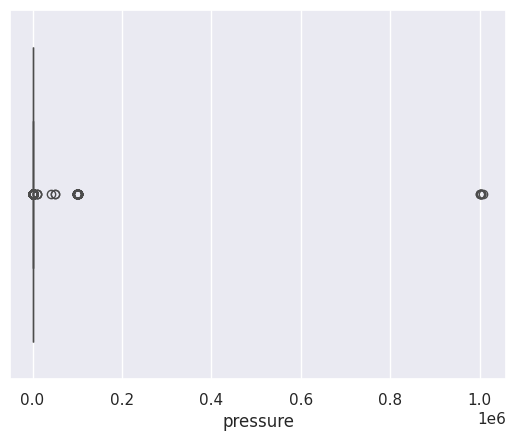

In [ ]:
# Plot chart for visualizing outliers
sns.boxplot(x=df_weather['pressure'])
plt.show()

A pressure of approximately 100,000 hPa (10 MPa) exceeds Venus's atmospheric pressure. Therefore, we will set values in the 'pressure' column above 1051 hPa to NaN, just above the highest recorded air pressure in the Iberian Peninsula. Additionally, we will replace values below 931 hPa, the lowest recorded pressure in the region, with NaN.

In [ ]:
# Replace outliers in 'pressure' with NaNs
df_weather.loc[df_weather.pressure > 1051, 'pressure'] = np.nan
df_weather.loc[df_weather.pressure < 931, 'pressure'] = np.nan

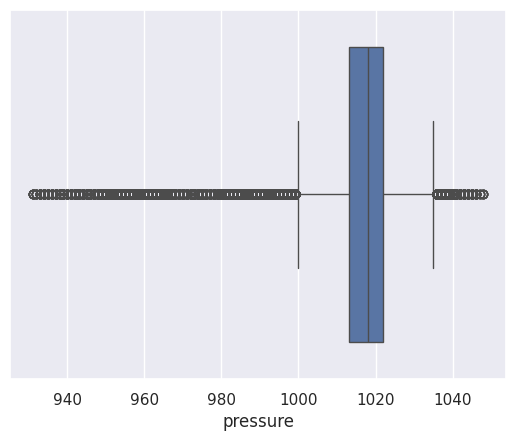

In [ ]:
# Reset the index to remove duplicates
df_reset_i = df_weather.reset_index(drop=True)

# Check for outliers in 'pressure' column again
sns.boxplot(x=df_reset_i['pressure'])
plt.show()

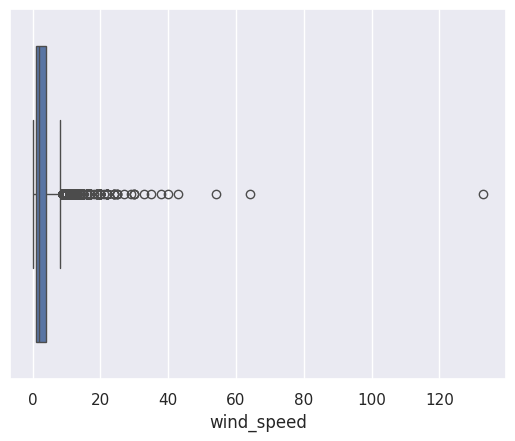

In [ ]:
# Check for outliers in 'wind_speed' column
sns.boxplot(x=df_weather['wind_speed'])
plt.show()

We will adopt a conservative approach and set 'wind_speed' values above 50 m/s (112 mph), the upper limit for F1 tornadoes, to NaN. This is relevant considering the last recorded F1 tornado in Spain was the Gandia tornado on September 28, 2012, about two years before the start of our data.

In [ ]:
# Replace outliers in 'wind_speed' with NaNs
df_weather.loc[df_weather.wind_speed > 50, 'wind_speed'] = np.nan
df_reset_i = df_weather.reset_index(drop=True)

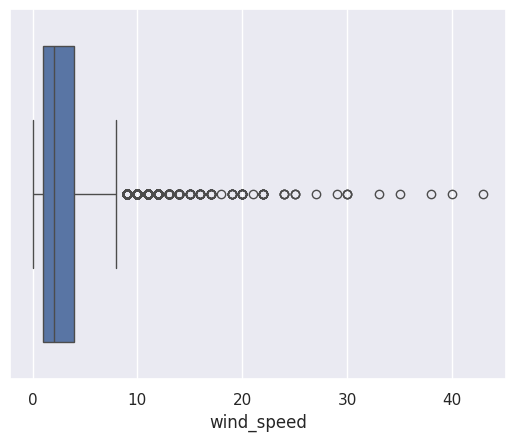

In [ ]:
sns.boxplot(x=df_reset_i['wind_speed'])
plt.show()

In [ ]:
# Fill null values using interpolation
df_weather.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

Everything appears to be in good working order, and df_weather is ready to be used as input to our model. We also need to plot the 'rain_1h' and 'rain_3h' columns, as we've mentioned that at least one of these (presumably 'rain_3h') is troublesome. Nonetheless, we'll do so after combining the two datasets.

## Let's Merge these two Datasets now

In [ ]:
# Split the df_weather into 5 dataframes (one for each city)

df_1, df_2, df_3, df_4, df_5 = [x for _, x in df_weather.groupby('city_name')]
dfs = [df_1, df_2, df_3, df_4, df_5]

In [ ]:
# ### Merge All DataFrames into the Final DataFrame
# Initialize the final DataFrame with energy data
df = df_energy

# Loop through each DataFrame in the list 'dfs'
for df1 in dfs:
    # Extract the unique city name from the current DataFrame
    city = df1['city_name'].unique()
    # Format the city name to create a string without special characters and spaces
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')

    # Add a suffix to all columns in the current DataFrame based on the city name
    df1 = df1.add_suffix('_{}'.format(city_str))

    # Merge the current DataFrame with the final DataFrame based on the 'time' column
    df = df.merge(df1, on=['time'], how='outer')

    # Drop the original 'city_name' column after merging to avoid redundancy
    df = df.drop('city_name_{}'.format(city_str), axis=1)

# Display the columns of the final merged DataFrame
df.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'temp_Barcelona',
       'temp_min_Barcelona', 'temp_max_Barcelona', 'pressure_Barcelona',
       'humidity_Barcelona', 'wind_speed_Barcelona', 'wind_deg_Barcelona',
       'rain_1h_Barcelona', 'rain_3h_Barcelona', 'snow_3h_Barcelona',
       'clouds_all_Barcelona', 'temp_Bilbao', 'temp_min_Bilbao',
       'temp_max_Bilbao', 'pressure_Bilbao', 'humidity_Bilbao',
       'wind_speed_Bilbao', 'wind_deg_Bilbao', 'rain_1h_Bilbao',
       'rain_3h_Bilbao', 'snow_3h_Bilbao', 'clo

*  This code merges multiple DataFrames containing energy data from different cities into a single final DataFrame.


In [ ]:
# Display the number of NaNs in the final DataFrame
print('There are {} missing values or NaNs in df_final.'.format(df.isnull().values.sum()))

# Calculate the number of duplicate rows in the final DataFrame
temp_final = df.duplicated(keep='first').sum()

# Print the count of duplicate rows
print('\nThere are {} duplicate rows in df_final based on all columns.'.format(temp_final))

There are 0 missing values or NaNs in df_final.

There are 0 duplicate rows in df_energy based on all columns.


* Missing Values:
  * The first print statement calculates and displays the total number of missing values (NaNs) in the DataFrame using the isnull() function.
* Duplicate Rows:
  * The second section calculates the number of duplicate rows in the DataFrame with the duplicated() function and prints the result.

In [ ]:
df.head(2)

generation biomass  \
time                                            
2014-12-31 23:00:00+00:00               447.0   
2015-01-01 00:00:00+00:00               449.0   

                           generation fossil brown coal/lignite  \
time                                                              
2014-12-31 23:00:00+00:00                                 329.0   
2015-01-01 00:00:00+00:00                                 328.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2014-12-31 23:00:00+00:00                 4844.0                       4821.0   
2015-01-01 00:00:00+00:00                 5196.0                       4755.0   

                           generation fossil oil  \
time                                               
2014-12-31 23:00:00+00:00                  162.0   
2015-01-01 00:00:00+00:00                  158.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2014-12-31 23:00:00+00:00                                        863.0   
2015-01-01 00:00:00+00:00                                        920.0   

                           generation hydro run-of-river and poundage  \
time                                                                    
2014-12-31 23:00:00+00:00                                      1051.0   
2015-01-01 00:00:00+00:00                                      1009.0   

                           generation hydro water reservoir  \
time                                                          
2014-12-31 23:00:00+00:00                            1899.0   
2015-01-01 00:00:00+00:00                            1658.0   

                           generation nuclear  generation other  ...  \
time                                                             ...   
2014-12-31 23:00:00+00:00              7096.0              43.0  ...   
2015-01-01 00:00:00+00:00              7096.0              43.0  ...   

                           temp_min_Valencia  temp_max_Valencia  \
time                                                              
2014-12-31 23:00:00+00:00            270.475            270.475   
2015-01-01 00:00:00+00:00            270.475            270.475   

                           pressure_Valencia  humidity_Valencia  \
time                                                              
2014-12-31 23:00:00+00:00             1001.0               77.0   
2015-01-01 00:00:00+00:00             1001.0               77.0   

                           wind_speed_Valencia  wind_deg_Valencia  \
time                                                                
2014-12-31 23:00:00+00:00                  1.0               62.0   
2015-01-01 00:00:00+00:00                  1.0               62.0   

                           rain_1h_Valencia  rain_3h_Valencia  \
time                                                            
2014-12-31 23:00:00+00:00               0.0               0.0   
2015-01-01 00:00:00+00:00               0.0               0.0   

                           snow_3h_Valencia  clouds_all_Valencia  
time                                                              
2014-12-31 23:00:00+00:00               0.0                  0.0  
2015-01-01 00:00:00+00:00               0.0                  0.0  

[2 rows x 72 columns]

### What all manipulations have we done and insights found?

* During the data wrangling process for the electricity price forecasting model, several key manipulations and insights were gained:

1. Handling Missing Values and Duplicates
NaN Values: The dataset was checked for missing values, and no NaNs were found initially.
Duplicate Rows: We found 8,622 duplicate rows in the df_weather dataset. These duplicates were removed using two methods:
df_weather: We kept the first rows with identical 'time' and 'city_name' values.
df_weather_2: We kept the last rows with identical 'time' and 'city_name' values.

2. Data Type Conversions
All columns with int64 type values were converted to float64 for consistency and easier handling during analysis.
The 'dt_iso' column was converted into a datetime type and renamed to 'time' to match the df_energy index.

3. Outlier Detection and Treatment
Pressure: Significant outliers were found in the 'pressure' column, with values as high as 1,008,371 hPa, an impossible value.
Values above 1051 hPa and below 931 hPa were replaced with NaN and then filled using linear interpolation.
Wind Speed: A wind speed outlier of 133 m/s was detected, which is abnormally high.
Wind speeds above 50 m/s were replaced with NaN and subsequently interpolated.

4. Weather Columns Simplification
Three qualitative columns, weather_main, weather_description, and weather_id, were examined for consistency.
Using the R-squared score, it was found that these columns had inconsistencies. The decision was made to drop all three columns after verifying that they were responsible for the dataset's duplicate rows.
The R-squared scores for numerical columns like temp, pressure, humidity, etc., were found to be perfect (1.0), confirming the consistency of these columns after the duplicate removal.

5. Handling Rain Data
There were issues noted between the rain_1h and rain_3h columns, where rain_3h had higher averages than rain_1h. Further analysis is needed, but this was postponed until after merging the weather and energy datasets.

6. Dataset Merging
After removing duplicates and cleaning the data, the weather dataset was split by city. These city-specific dataframes were merged with df_energy based on the 'time' index. The final dataset includes weather features for each city alongside energy generation and pricing information.

* Insights

  Outliers: The initial inspection revealed significant outliers, especially in the pressure and wind_speed columns. These were replaced and treated, providing a cleaner dataset for modeling.

  Qualitative Weather Data: The qualitative weather descriptions were found to introduce unnecessary duplicates and inconsistencies. Removing these columns simplified the dataset without losing significant information.

  Matching Rows Between Datasets: After cleaning, the number of rows in both df_weather and df_energy matched perfectly, ensuring accurate alignment of time-series data for modeling.

* This data cleaning process has ensured that the dataset is ready for modeling and will improve the accuracy and robustness of the machine learning models used for electricity price forecasting.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Boxplots for Prices vs. Weather Parameters

<Figure size 1600x600 with 0 Axes>

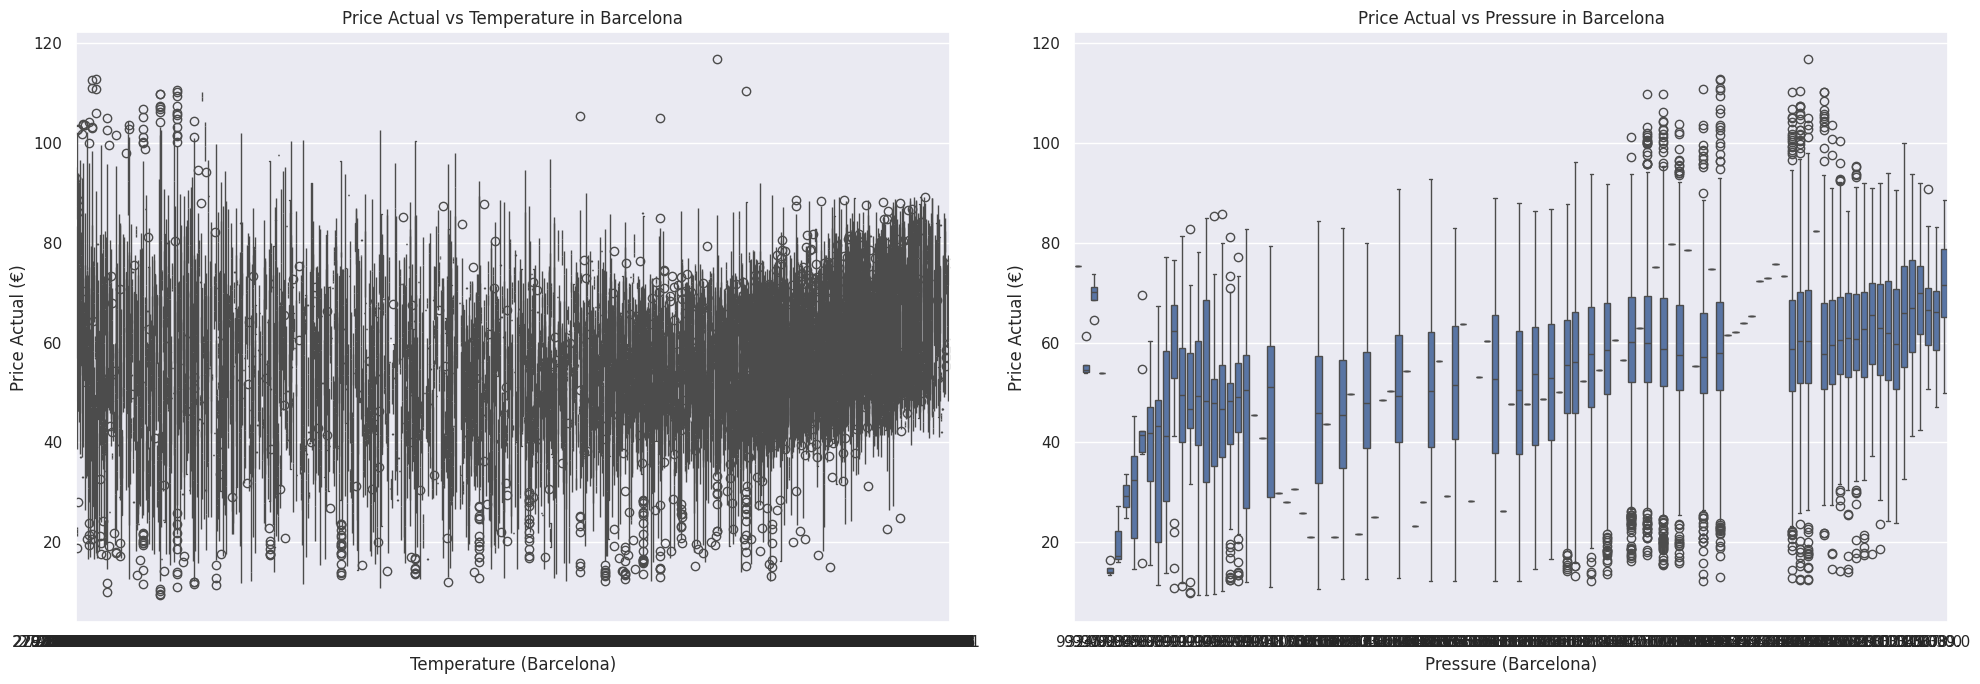

In [ ]:
# Setting figure size for better visibility
plt.figure(figsize=(16, 6))

# Create subplots for boxplots of prices vs weather parameters
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

# Boxplot 1: Price actual vs temperature in Barcelona
sns.boxplot(x='temp_Barcelona', y='price actual', data=df, ax=axs[0])
axs[0].set_title('Price Actual vs Temperature in Barcelona')
axs[0].set_xlabel('Temperature (Barcelona)')
axs[0].set_ylabel('Price Actual (€)')

# Boxplot 2: Price actual vs pressure in Barcelona
sns.boxplot(x='pressure_Barcelona', y='price actual', data=df, ax=axs[1])
axs[1].set_title('Price Actual vs Pressure in Barcelona')
axs[1].set_xlabel('Pressure (Barcelona)')
axs[1].set_ylabel('Price Actual (€)')

# Adjust layout for readability
plt.tight_layout()
plt.show()

##### 1. Why did we pick the specific chart?

I selected boxplots for this analysis because boxplots are excellent for visualizing the distribution of data, particularly in relation to categorical or continuous variables like weather parameters (temperature, pressure) against a numerical target (electricity prices).

##### 2. What are the insights found from the chart?

* From the temperature vs. price actual boxplot, we observe:

  Electricity prices seem to be fairly spread out across different temperature levels, but there is no clear upward or downward trend in prices as temperature changes.

  A significant number of outliers exist, especially at lower price levels.
The data shows considerable variance in prices across the entire range of temperatures in Barcelona, suggesting other factors (beyond temperature) are influencing electricity prices.

* From the pressure vs. price actual boxplot, we see:

  Prices exhibit a pattern of increasing variability at higher pressure levels.
Lower pressure levels have more concentrated price ranges, with the median closer to lower prices.

  As pressure increases, the spread of electricity prices increases as well, potentially indicating some impact of air pressure on demand/supply dynamics.

##### 3. Will the gained insights help creating a positive business impact?

  Yes, the gained insights could contribute positively to business impact in the following ways:

  Forecasting and Optimization: The relationship between pressure and electricity prices, in particular, may help in developing more accurate forecasting models, as higher pressure is correlated with more price variability. Businesses can use this insight to better optimize when to buy or sell electricity in advance.
  
  Risk Management: Understanding the presence of outliers and variations across weather parameters can help energy companies manage price volatility better, reducing the risk associated with price spikes or drops due to unexpected weather changes.

#### Boxplots for Prices vs. Weather Parameters

<Figure size 1600x600 with 0 Axes>

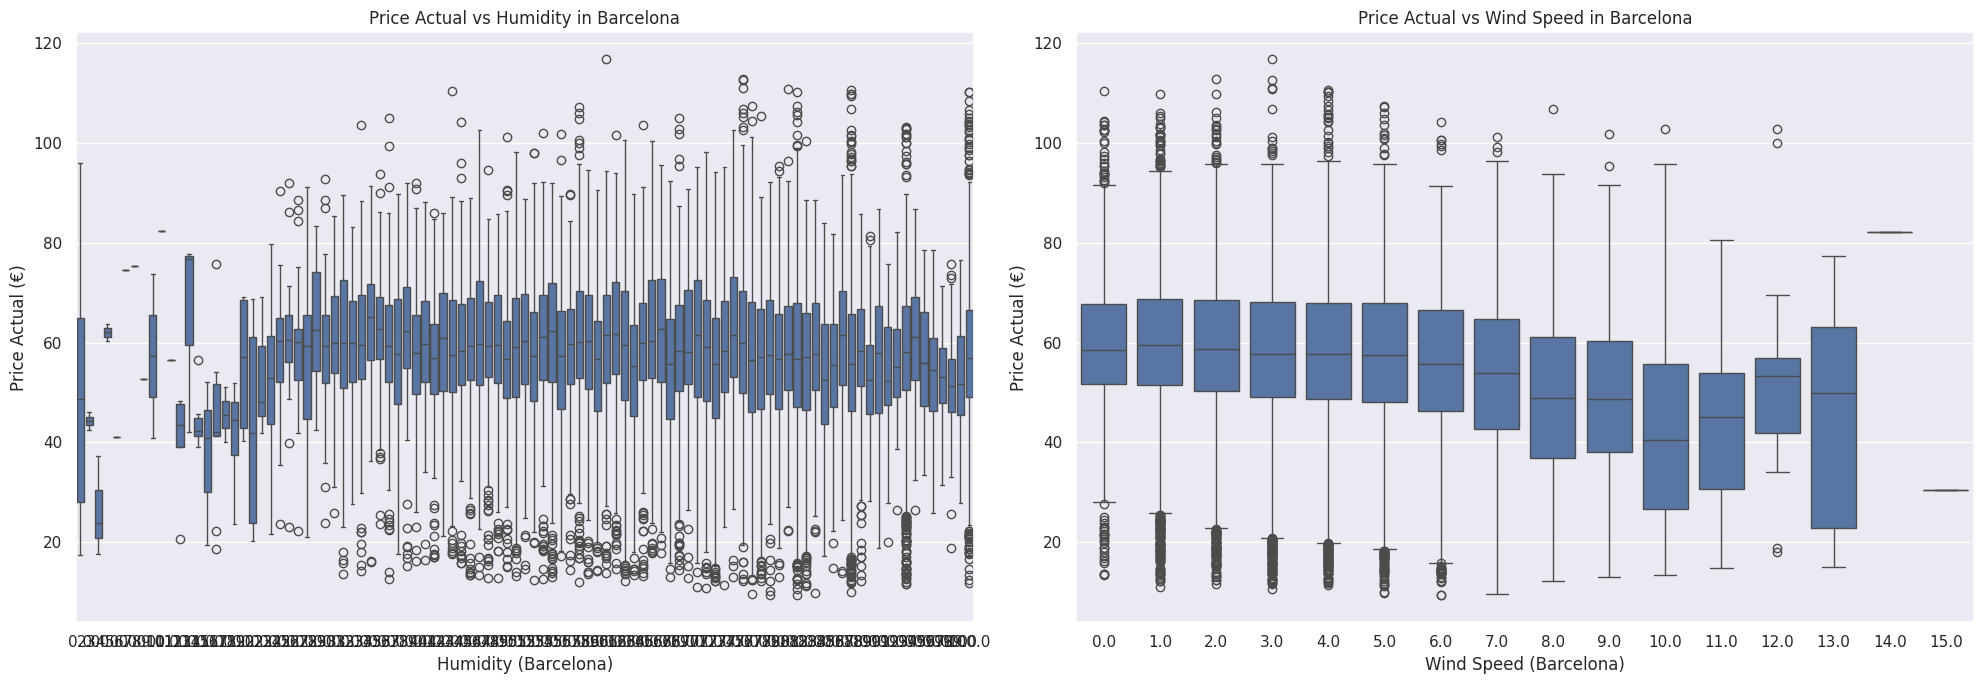

In [ ]:
# Boxplot 3: Price actual vs humidity in Barcelona
plt.figure(figsize=(16, 6))

# Create subplots for boxplots of prices vs weather parameters
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

sns.boxplot(x='humidity_Barcelona', y='price actual', data=df, ax=axs[0])
axs[0].set_title('Price Actual vs Humidity in Barcelona')
axs[0].set_xlabel('Humidity (Barcelona)')
axs[0].set_ylabel('Price Actual (€)')

# Boxplot 4: Price actual vs wind speed in Barcelona
sns.boxplot(x='wind_speed_Barcelona', y='price actual', data=df, ax=axs[1])
axs[1].set_title('Price Actual vs Wind Speed in Barcelona')
axs[1].set_xlabel('Wind Speed (Barcelona)')
axs[1].set_ylabel('Price Actual (€)')

# Adjust layout for readability
plt.tight_layout()
plt.show()

##### 1. Why did we pick the specific chart?

  Boxplots are effective in highlighting outliers, the median, and the interquartile range, which can help us understand the variability of electricity prices under different weather conditions.

* Boxplots allow us to:

1. Identify patterns or trends, such as how electricity prices fluctuate across different ranges of temperature or pressure.

2. Detect any potential outliers that could skew the analysis.
3. Compare the spread and central tendency of prices under different weather scenarios.

##### 2. What are the insights found from the chart?

  From the humidity vs. price actual boxplot:

* Electricity prices show greater variability at higher humidity levels, especially in the range between 60% and 80%. The prices tend to stabilize at higher humidity levels (80% and above).
* Outliers are present across all humidity levels, particularly at higher prices.
* While prices fluctuate significantly in lower humidity ranges, the median price remains fairly consistent across different humidity levels.
From the wind speed vs. price actual boxplot:

* Electricity prices appear relatively stable at lower wind speeds (0 to 5 m/s), with less variability compared to higher wind speeds.
* The distribution of prices becomes more spread out at wind speeds above 10 m/s, indicating possible influence of high wind conditions on price fluctuations.
* Outliers are more prevalent at both lower and higher extremes of wind speed, suggesting that certain wind conditions may cause significant price deviations.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the insights from these boxplots can be useful for the business in the following ways:

perational Adjustments: For instance, during high wind speeds, companies can anticipate more significant price variations and prepare for operational adjustments to manage cost or sell excess energy during profitable periods.

#### Bar Chart

In [ ]:
# Chart - 3 visualization code
# Summing up the generation sources for each city
generation_columns = [
    'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
    'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption',
    'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear',
    'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind onshore'
]

# Aggregating generation for each city
generation_by_city = pd.DataFrame({
    'Barcelona': df[['temp_Barcelona'] + generation_columns].sum(),
    'Bilbao': df[['temp_Bilbao'] + generation_columns].sum(),
    'Madrid': df[['temp_Madrid'] + generation_columns].sum(),
    'Seville': df[['temp_Seville'] + generation_columns].sum(),
    'Valencia': df[['temp_Valencia'] + generation_columns].sum()
})

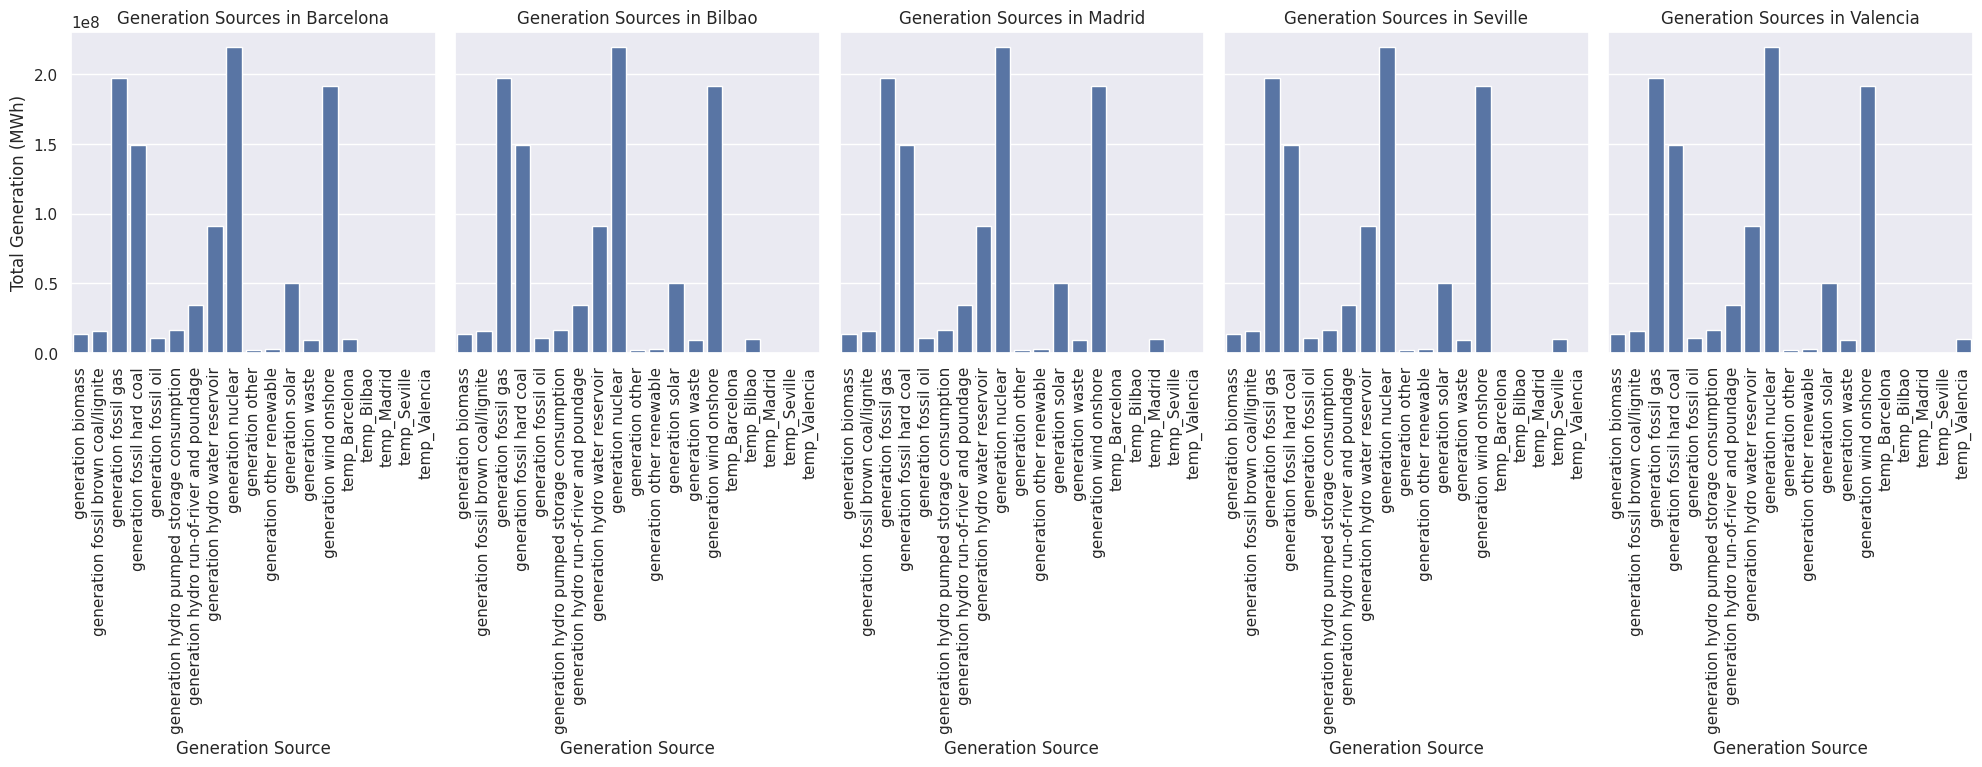

In [ ]:
# Plotting the bar plots for each city
fig, axes = plt.subplots(1, 5, figsize=(20, 8), sharey=True)

cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']

for i, city in enumerate(cities):
    sns.barplot(ax=axes[i], x=generation_by_city.index, y=generation_by_city[city])
    axes[i].set_title(f'Generation Sources in {city}')
    axes[i].set_xlabel('Generation Source')
    axes[i].set_ylabel('Total Generation (MWh)')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did we pick the specific chart?

 The specific chart was picked because it provides a comprehensive comparison of electricity generation sources across five major cities. This allows for a detailed analysis of how different regions utilize various energy sources, which is crucial for understanding regional energy strategies and policies.

##### 2. What are the insights found from the chart?

Dominant Energy Sources: In all five cities, nuclear and  generation Fossile gas are significant sources of electricity generation.

Regional Variations: There are noticeable differences in the reliance on certain energy sources. For example, Bilbao and Seville have higher contributions from fossil gas compared to other cities.

Renewable Energy: The contribution of renewable energy sources such as wind onshore and solar varies significantly across the cities, with some cities like Valencia showing higher utilization of wind onshore.

Fossil Fuels: Fossil fuel usage (coal, gas, oil) is still prevalent but varies in extent across the cities.

##### 3. Will the gained insights help creating a positive business impact?


Yes, the gained insights can help create a positive business impact in several ways:

Investment Decisions: Businesses can identify which cities are investing more in renewable energy and align their investments accordingly.

Policy Making: Policymakers can use this data to promote cleaner energy sources in cities that are heavily reliant on fossil fuels.

Market Opportunities: Companies in the renewable energy sector can target cities with lower renewable energy contributions for potential market expansion.

Resource Allocation: Energy companies can optimize resource allocation by understanding regional energy generation patterns and demands.

#### Chart - 4 Time-series line plot

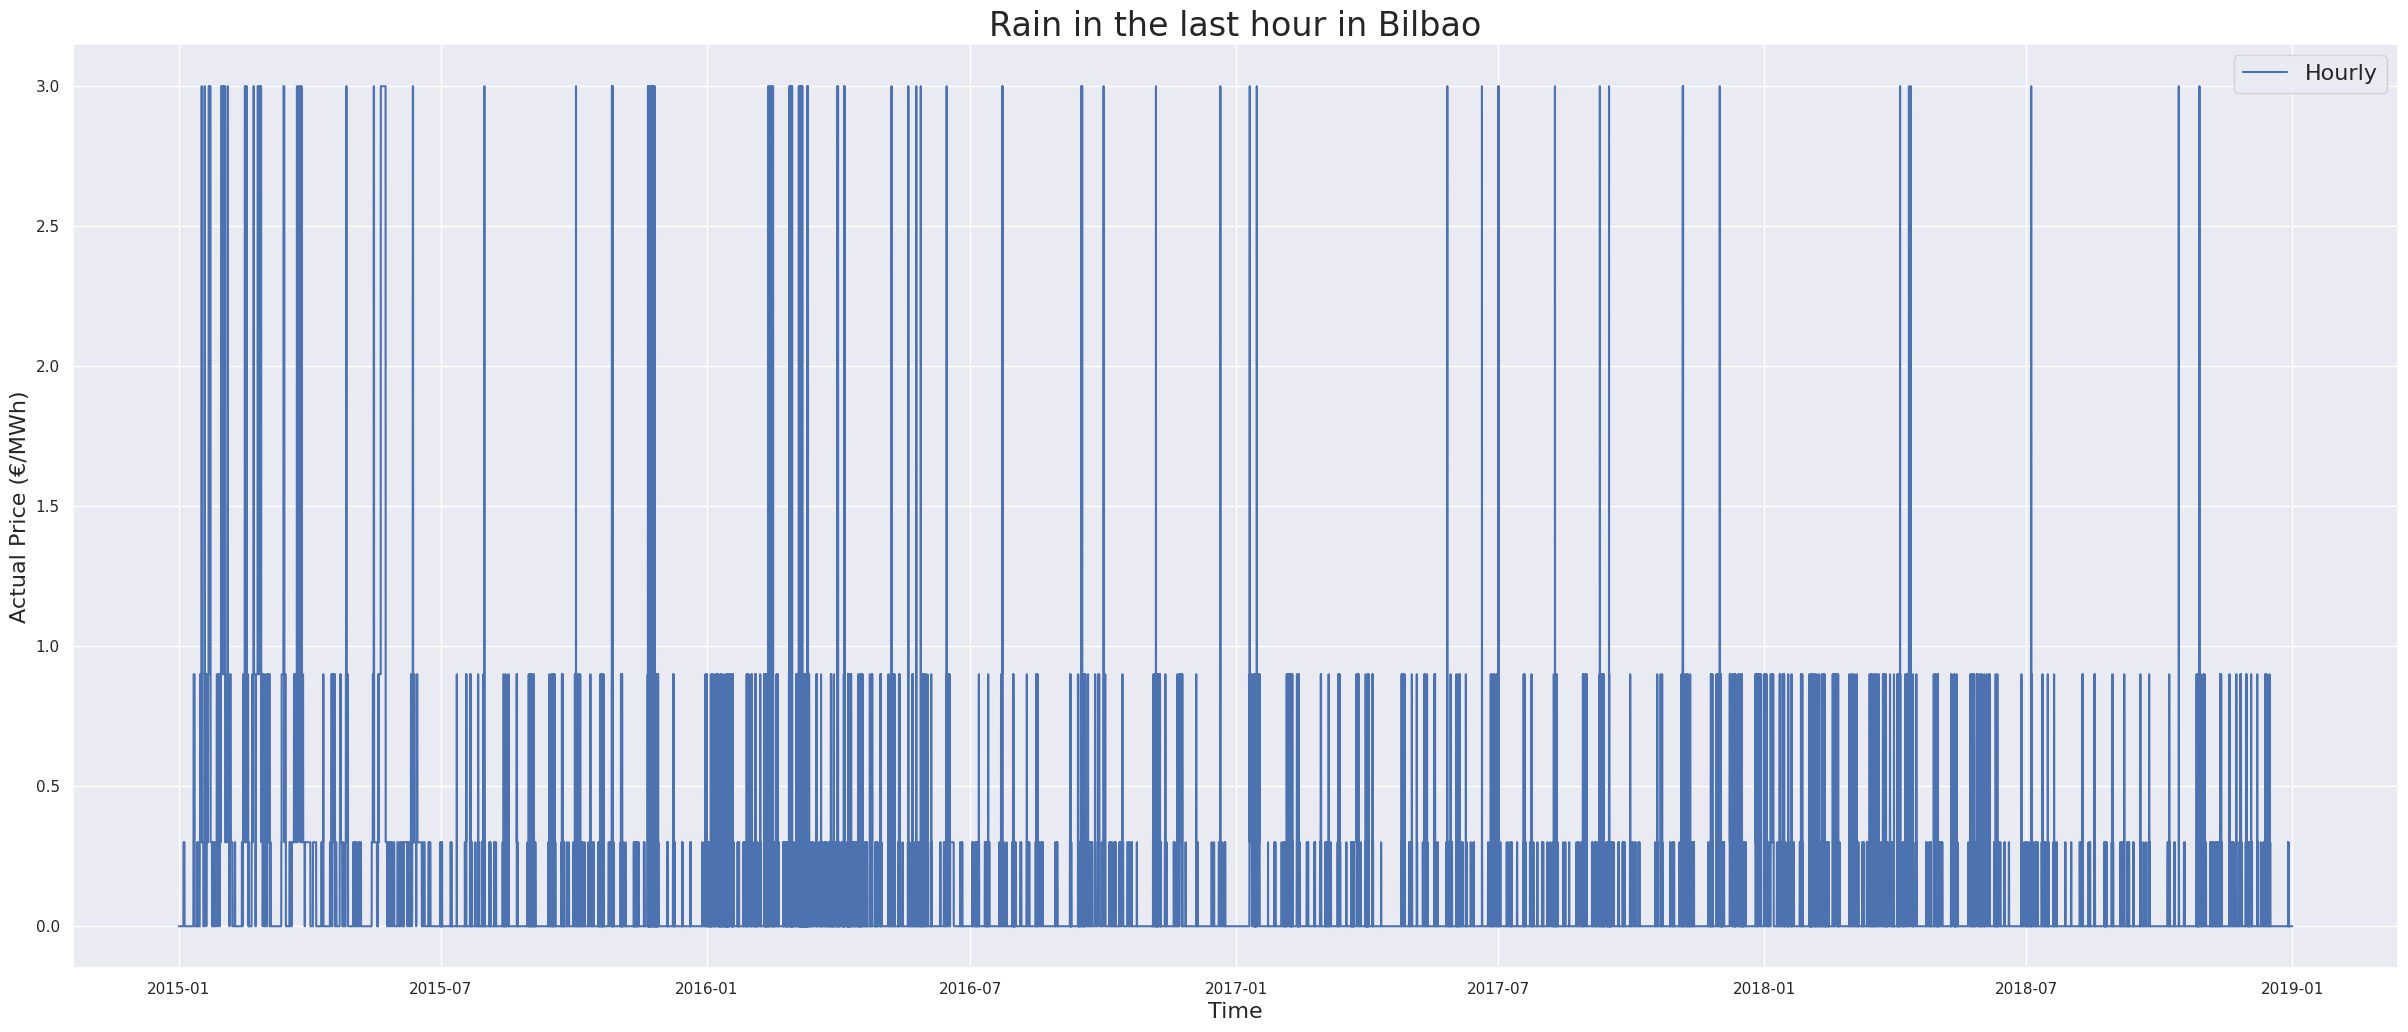

In [ ]:
# Chart - 4 visualization code
# Plot the 'rain_1h' for Bilbao
ax = plot_series(df=df, column='rain_1h_Bilbao',
                 label='Hourly', ylabel='Actual Price (€/MWh)',
                 title='Rain in the last hour in Bilbao')
plt.show()

##### 1. Why did we pick the specific chart?

This time-series line plot was chosen to examine the relationship between rainfall and electricity prices over time in Bilbao.

 It allows us to observe how actual prices change in response to varying amounts of rain and helps analyze any noticeable trends over the observed period (from 2015 to 2019).

##### 2. What are the insights found from the chart?

* Rain Frequency and Intensity: From the chart, rain events appear frequent but typically show low intensity in Bilbao. This is inferred from the concentration of values close to 0 on the y-axis, though there are a few spikes above 1 mm of rainfall.
* No Strong Price Correlation: There doesn't seem to be a direct correlation between periods of high rainfall and significant changes in electricity prices. The actual prices seem to remain relatively stable during rain events, with some variability but no clear upward or downward trend associated with rainfall intensity.
* Seasonal Patterns: The absence of a clear correlation might suggest that factors other than rainfall (such as temperature, demand, or wind) have a more prominent role in determining price fluctuations.

##### 3. Will the gained insights help creating a positive business impact?


Yes, these insights can help:

Refining Forecast Models: The lack of strong correlation between rain and prices could inform energy traders and modelers to focus on other factors like demand surges, generation from renewable energy sources (e.g., wind or solar), or other weather-related metrics like temperature or wind speed. This could improve predictive accuracy.

#### Time-Series line chart

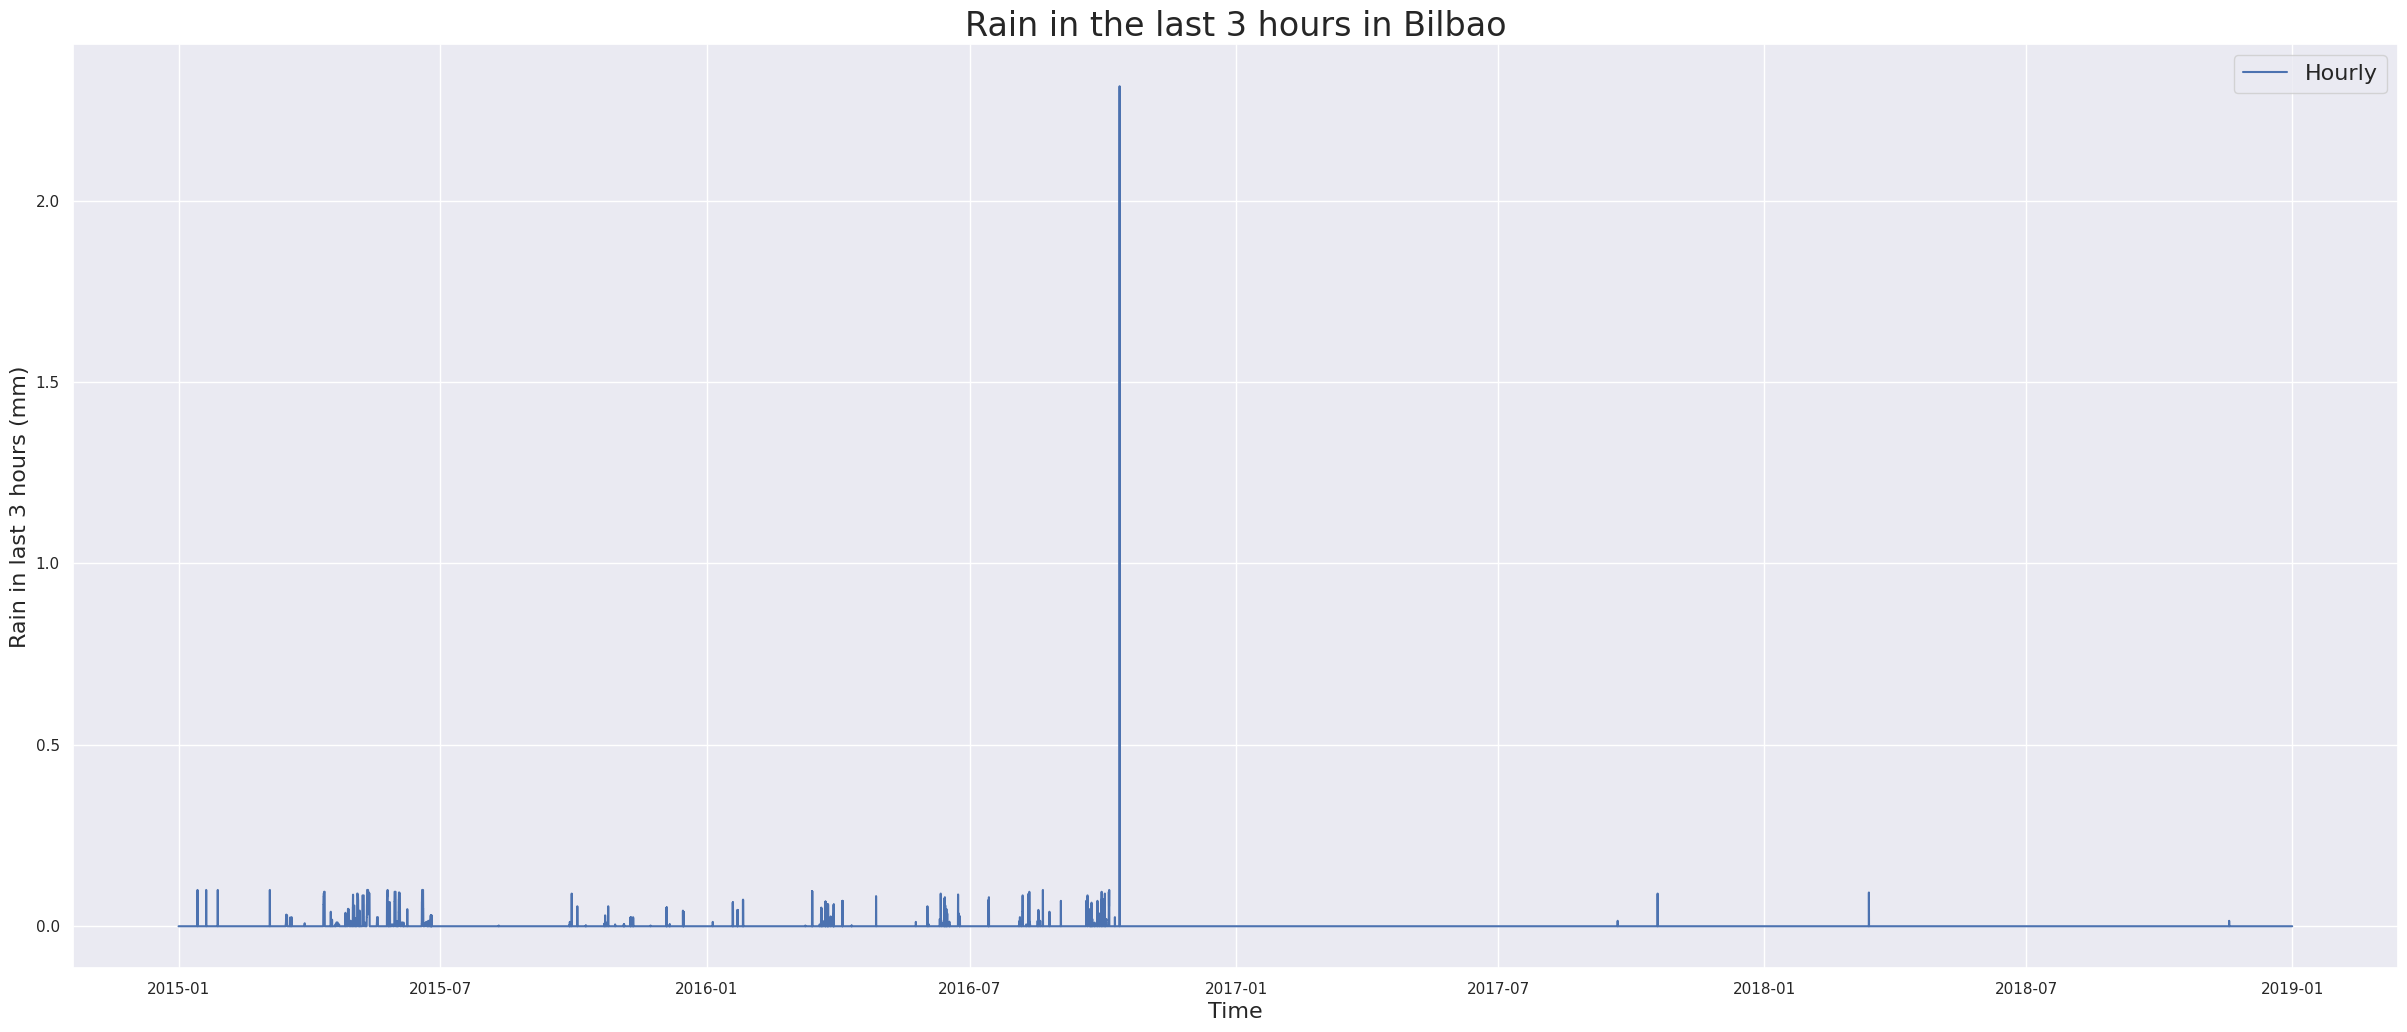

In [ ]:
# Chart - 5 visualization code
# Plot the 'rain_3h' for Bilbao

ax = plot_series(df, 'rain_3h_Bilbao',
                 label='Hourly', ylabel='Rain in last 3 hours (mm)',
                 title='Rain in the last 3 hours in Bilbao')
plt.show()

##### 1. Why did we pick the specific chart?

The chosen time-series line chart illustrates "Rain in the Last 3 Hours in Bilbao (mm)" over the period from 2015 to 2019. This chart was selected to visualize the trends and potential impact of rain on electricity prices over time in the specific region of Bilbao. The time-series format effectively conveys how rain patterns evolve, and by detecting outliers or anomalies (like the clear spike in mid-2016), one can investigate unusual events more closely.

##### 2. What are the insights found from the chart?

* Rainfall Outliers: A significant outlier is evident around mid-2016, where the recorded rain level in Bilbao exceeds 2 mm in the last 3 hours, while most other observations are close to zero or below 0.5 mm. This suggests that there might be either a data entry error or an unusual weather event during that period.

* Sparse and Low Rainfall Events: Most of the rain measurements are consistently low, suggesting that rain is either infrequent or not intense in Bilbao during the analyzed period (except for the spike).

* Data Quality Issue: The significant outlier shows potential data issues that need to be addressed. Cleaning this data, particularly removing or investigating this spike, will be essential to ensure the accuracy of insights.

##### 3. Will the gained insights help creating a positive business impact?


Yes, the insights gained can have a positive business impact, as follows:

Data Cleaning: Identifying and correcting outliers like the one seen here is crucial for improving the accuracy of the dataset. Clean data will lead to more reliable forecasting models for electricity prices, as it prevents incorrect assumptions.

In [ ]:
cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']

for city in cities:
    df = df.drop(['rain_3h_{}'.format(city)], axis=1)

#### Chart - 6

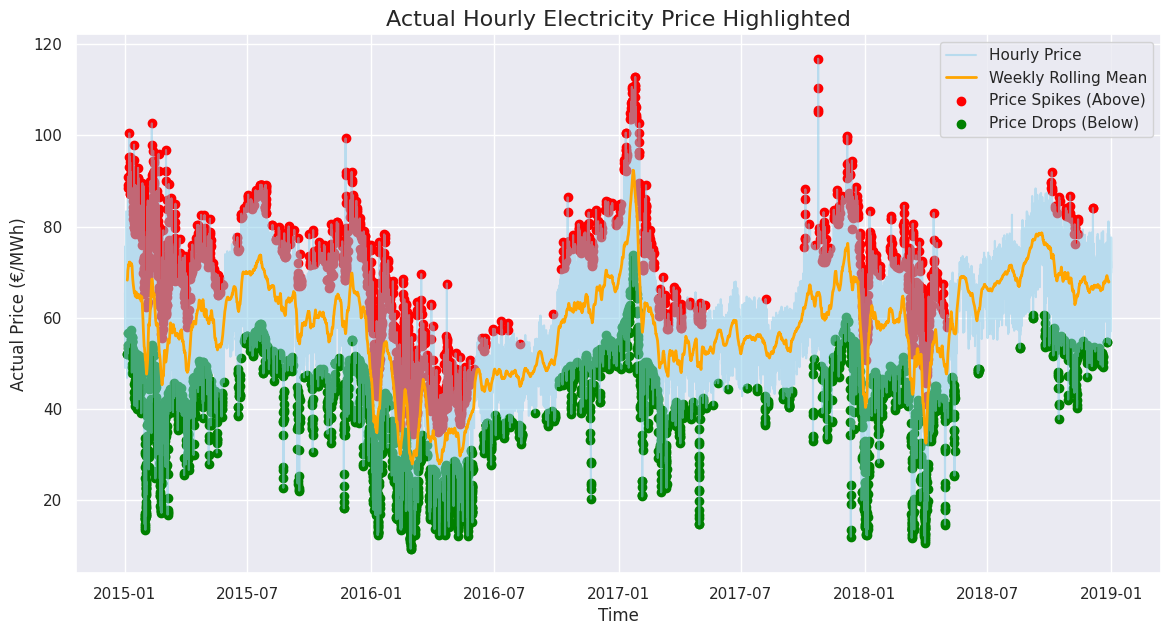

In [ ]:
# Chart visualization code
rolling = df['price actual'].rolling(24*7, center=True).mean()

# Define anomaly threshold (20% deviation from the rolling mean)
threshold = 0.20
anomalies_above = df['price actual'] > (1 + threshold) * rolling
anomalies_below = df['price actual'] < (1 - threshold) * rolling

# Plot the hourly actual price and rolling mean
plt.figure(figsize=(14, 7))

# Change color of the graph to a custom palette
plt.plot(df['price actual'], label='Hourly Price', color='skyblue', alpha=0.5)
plt.plot(rolling, label='Weekly Rolling Mean', color='orange', linewidth=2)

# Highlight sudden spikes
plt.scatter(df.index[anomalies_above], df['price actual'][anomalies_above],
            color='red', label='Price Spikes (Above)', zorder=1)
plt.scatter(df.index[anomalies_below], df['price actual'][anomalies_below],
            color='green', label='Price Drops (Below)', zorder=1)

# Labels and title
plt.title('Actual Hourly Electricity Price Highlighted', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Actual Price (€/MWh)', fontsize=12)

# Show legend
plt.legend()

# Show plot
plt.show()

##### 1. Why did we pick the specific chart?

The specific chart was chosen because it vividly illustrates the fluctuations in hourly electricity prices.
The inclusion of elements like the weekly rolling mean, price spikes, and price drops provides a nuanced view of the electricity market trends, making it a valuable tool for analyzing price dynamics.

##### 2. What iare the insights found from the chart?

* Fluctuating Prices: There are significant variations in electricity prices over time, with notable spikes and drops.

* Trend Patterns: The weekly rolling mean line offers a smoother view of the overall trend, highlighting periods of consistent price increases or decreases.

* Extreme Events: The red and green dots pinpoint periods of extreme price fluctuations, which can be critical for understanding market volatility.

* Temporal Insights: The chart reveals seasonal or cyclical patterns in electricity pricing, useful for predicting future price movements.

##### 3. Will the gained insights help creating a positive business impact?


Absolutely, the insights can aid in creating a positive business impact by:

Forecasting and Planning: Companies can better forecast future electricity prices and plan their operations to optimize costs.

Risk Management: Understanding periods of price volatility helps in developing strategies to mitigate financial risks.

Market Analysis: Businesses can analyze market trends to identify opportunities for investment or expansion in the energy sector.

Strategic Decision Making: Policymakers and business leaders can use these insights to make informed decisions on energy purchasing and utilization strategies.

#### Line Plot

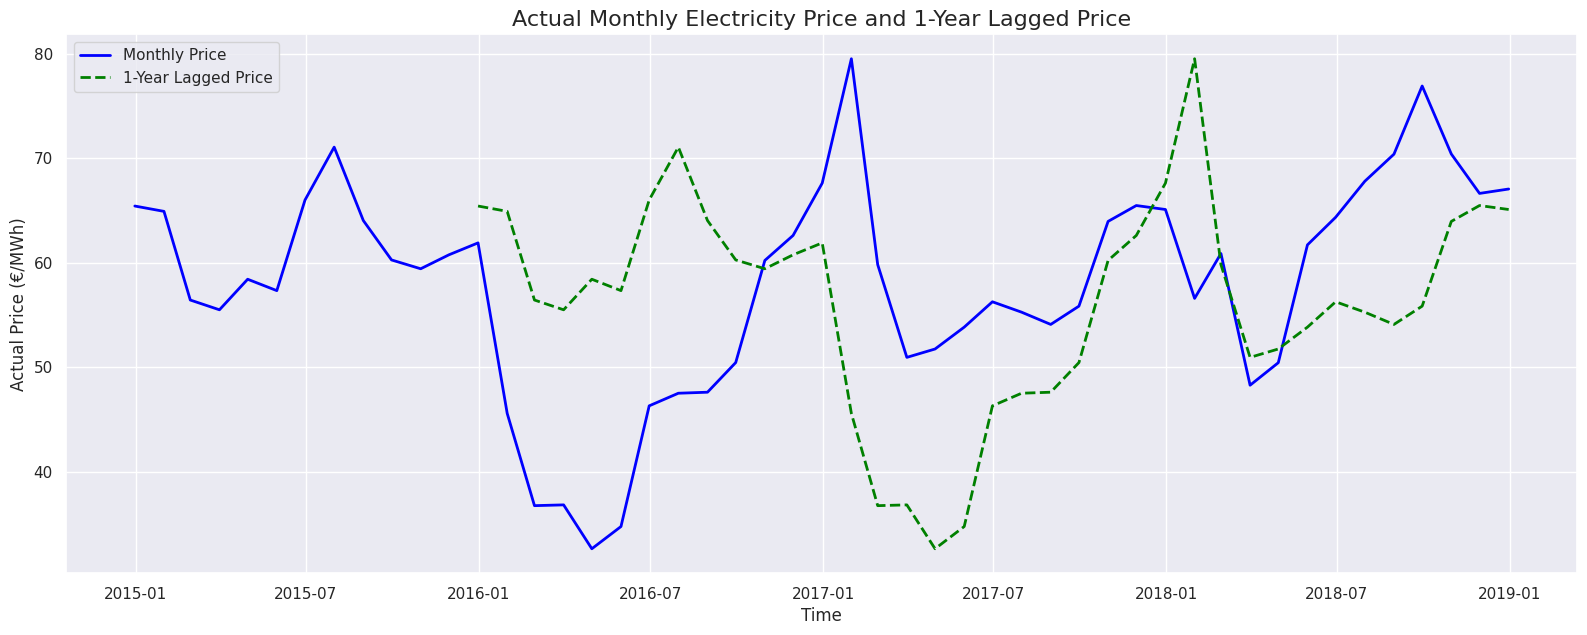

In [ ]:
# Chart - 7 visualization code
# Resample to monthly frequency (taking the mean for each month)
monthly_price = df['price actual'].resample('M').mean()

# Create a 1-year lagged price by shifting the data by 12 months
lagged_price = monthly_price.shift(12)

# Plot the monthly actual price and 1-year lagged price
plt.figure(figsize=(19.5, 7))

# Plot the monthly actual price
plt.plot(monthly_price, label='Monthly Price', color='blue', linewidth=2)

# Plot the 1-year lagged price
plt.plot(lagged_price, label='1-Year Lagged Price', color='green', linestyle='--', linewidth=2)

# Labels and title
plt.title('Actual Monthly Electricity Price and 1-Year Lagged Price', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Actual Price (€/MWh)', fontsize=12)

# Show legend
plt.legend()

# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

The chart effectively illustrates the relationship between the actual monthly electricity price and the 1-year lagged price.

This helps to identify trends and patterns in electricity pricing by comparing current prices with those from the same month in the previous year. The clear visualization of these trends over time makes it a valuable tool for analysis.

##### 2. What are the insights found from the chart?

* Trends Over Time: The chart reveals how electricity prices change month-to-month and year-to-year.

* Pattern Recognition: By comparing the actual monthly prices to the 1-year lagged prices, we can identify recurring patterns or anomalies in pricing.

* Market Stability: Observing the lagged price alongside the actual price helps to assess the stability and predictability of the electricity market.

##### 3. Will the gained insights help creating a positive business impact?


Yes, these insights can help create a positive business impact in several ways:

Price Forecasting: By understanding historical price patterns, businesses can better forecast future prices and make informed decisions about purchasing and resource allocation.

Strategic Planning: Companies can develop strategies to mitigate risks associated with price volatility.

Investment Decisions: Insights into price trends can guide investments in energy infrastructure, ensuring alignment with market conditions.

#### Histogram with a density plot.

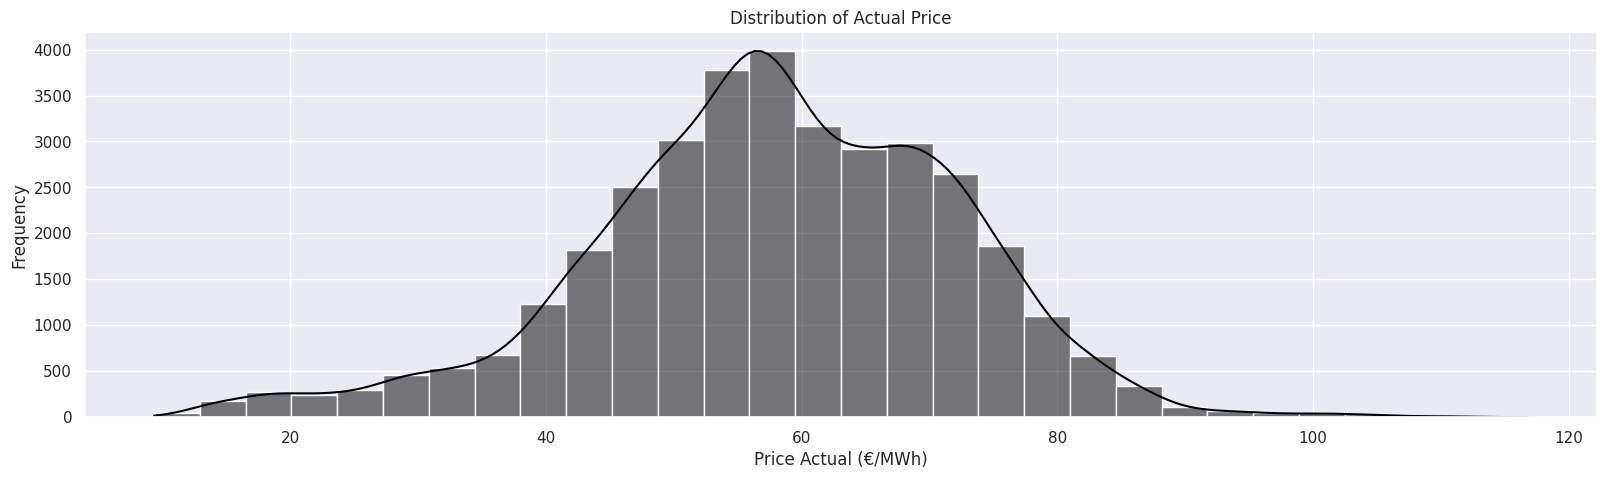

In [ ]:
# Chart - 8 visualization code
# Set up the style and figure size
sns.set_style("darkgrid")
plt.figure(figsize=(19.5, 5))

# Plot the histogram and KDE for 'price actual'
sns.histplot(df['price actual'], kde=True, color='black', bins=30)
plt.title('Distribution of Actual Price')
plt.xlabel('Price Actual (€/MWh)')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did we pick the specific chart?

This histogram with a density plot was selected because it provides a clear visual representation of the distribution of actual electricity prices.

##### 2. What are the insights found from the chart?

Common Price Range: The peak of the distribution is around 60 €/MWh, indicating that this is the most frequent price range.

Distribution Shape: The price distribution is roughly symmetric with a slight skew towards higher prices.

Frequency Analysis: The chart shows that the majority of prices fall within a specific range.

##### 3. Will the gained insights help creating a positive business impact?


Price Setting: Businesses can use this information to set more competitive pricing strategies by understanding common price ranges and frequency.

Risk Assessment: The insights into price distribution help in assessing the risk of price spikes, aiding in better risk management.

Market Strategy: By understanding the distribution of prices, companies can develop more effective market strategies and make informed decisions regarding energy purchasing and sales.

#### Correlation Heatmap

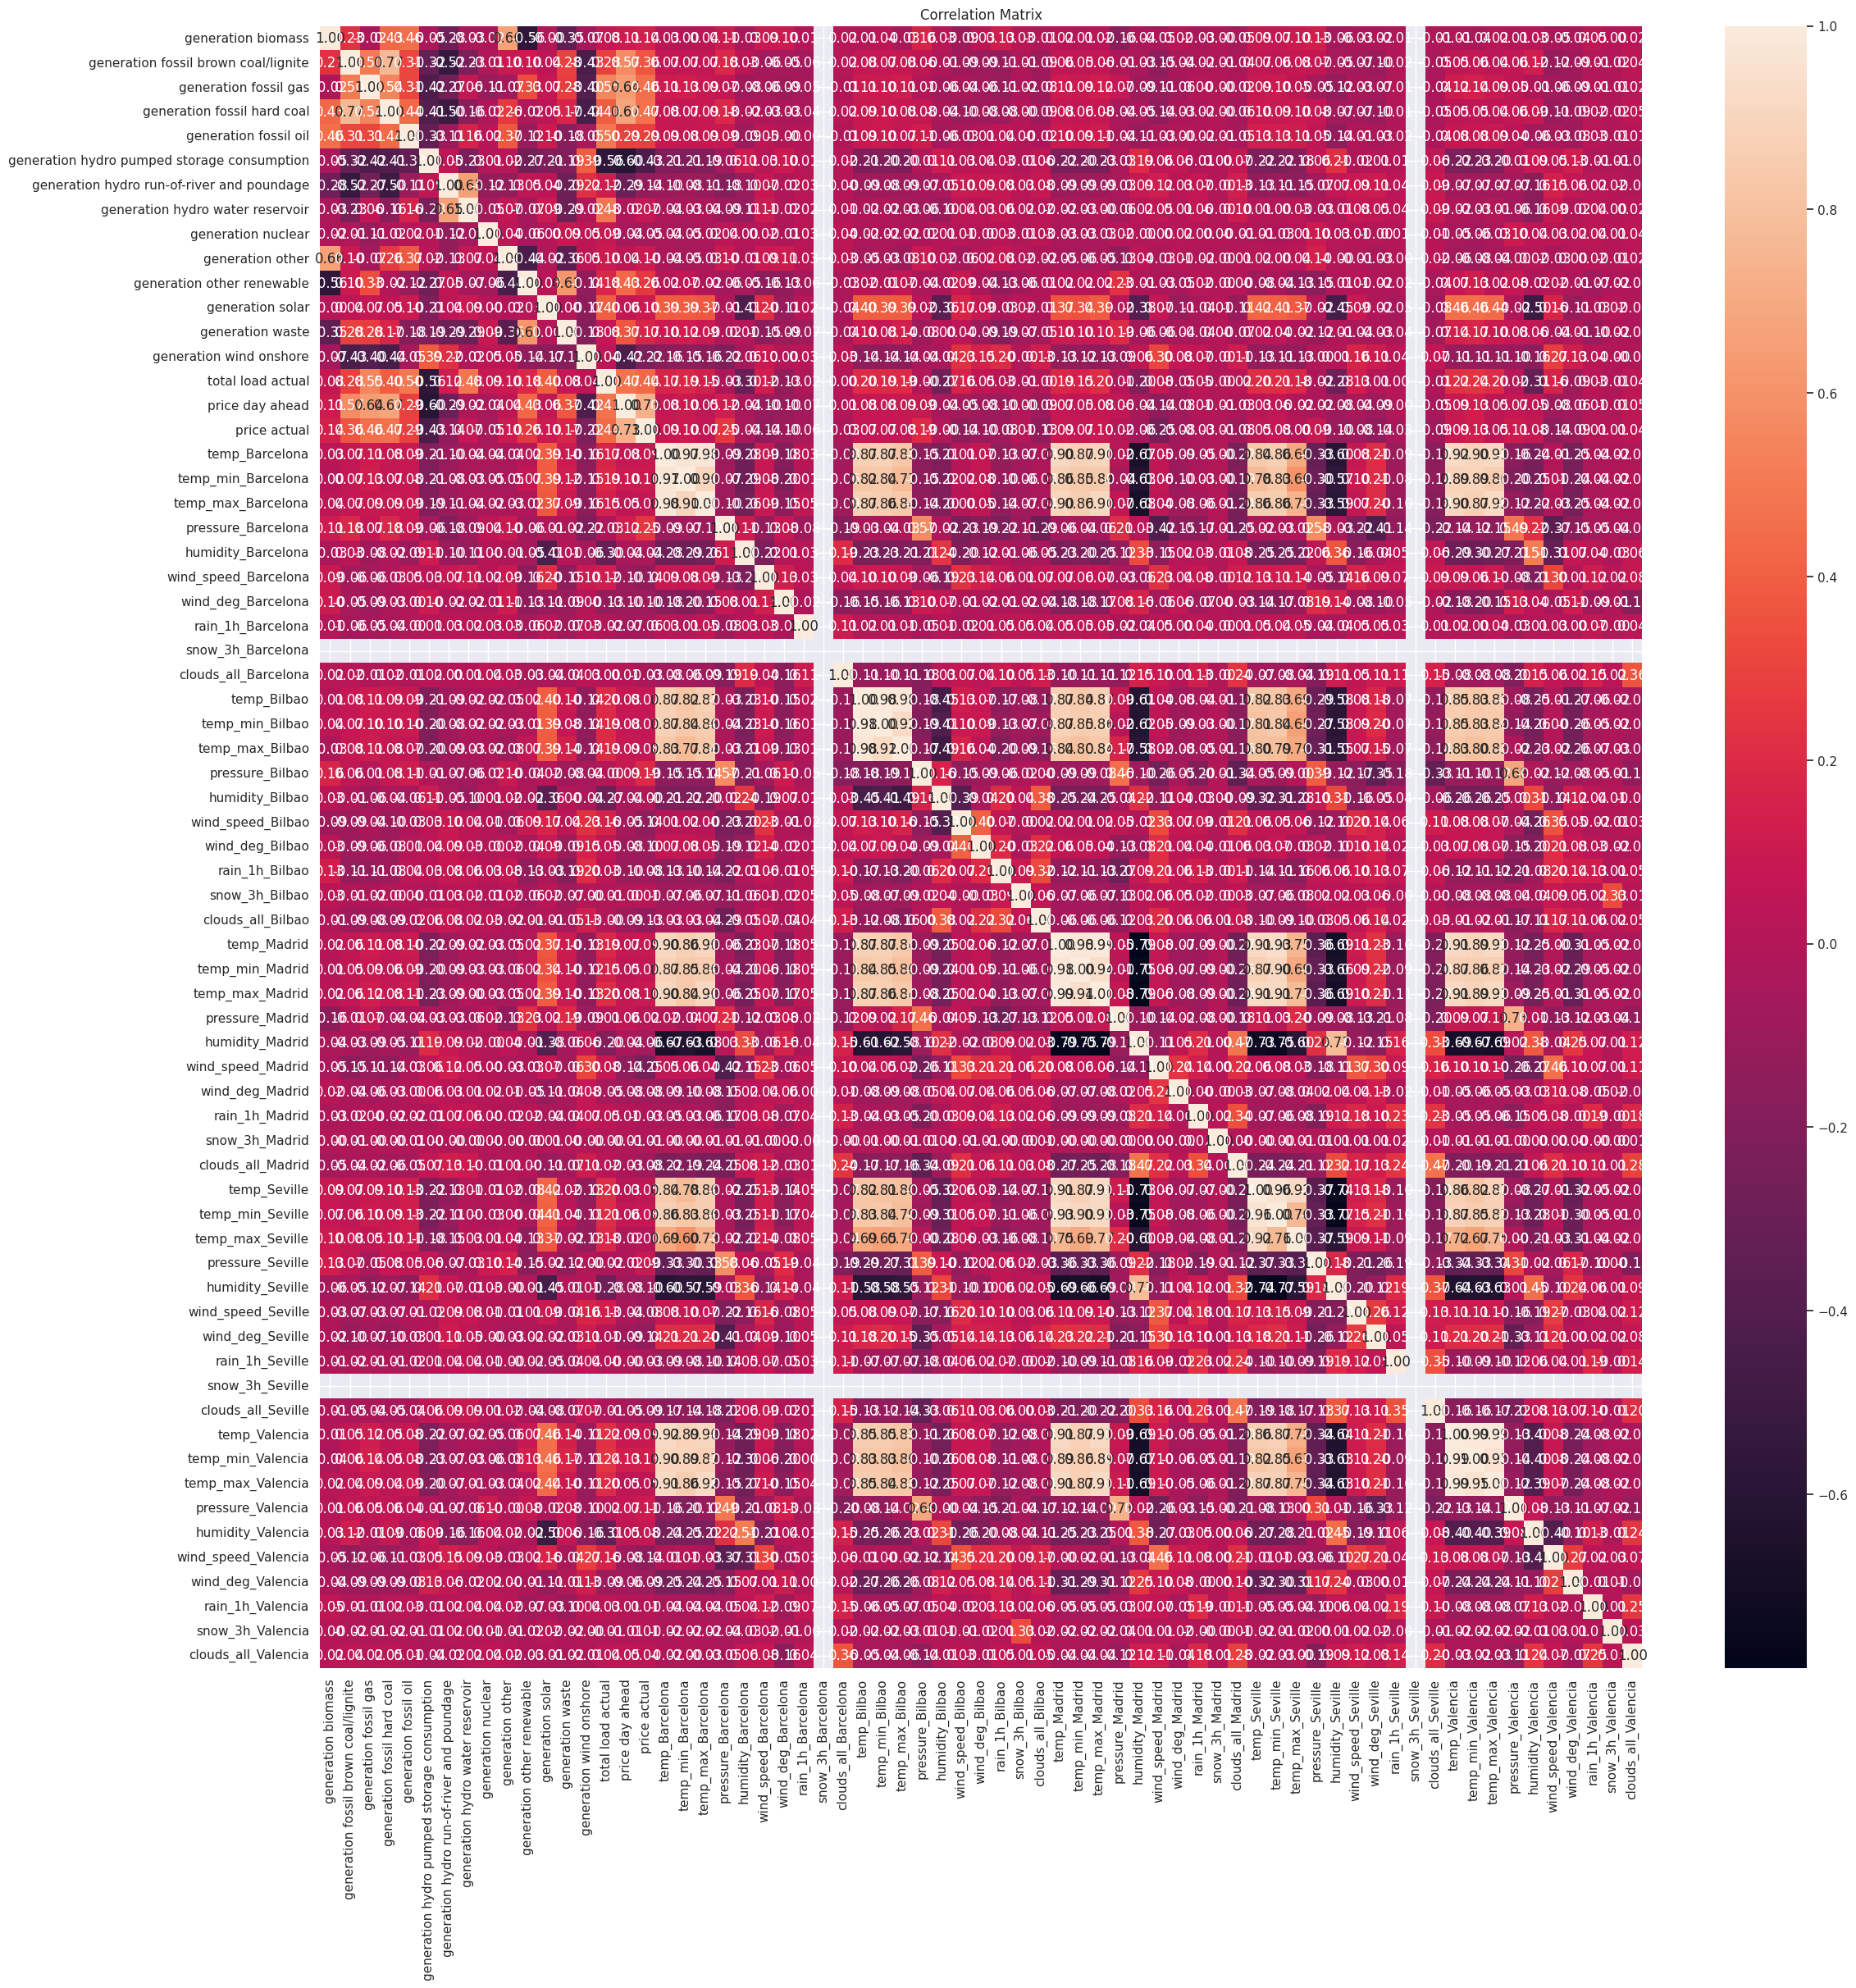

In [ ]:
# Correlation Heatmap visualization code

correlations = df.corr(method='pearson')
fig = plt.figure(figsize=(26, 26))
sns.heatmap(correlations, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

We can see that there are many variables that are significantly connected with each other.

#### Pair Plot

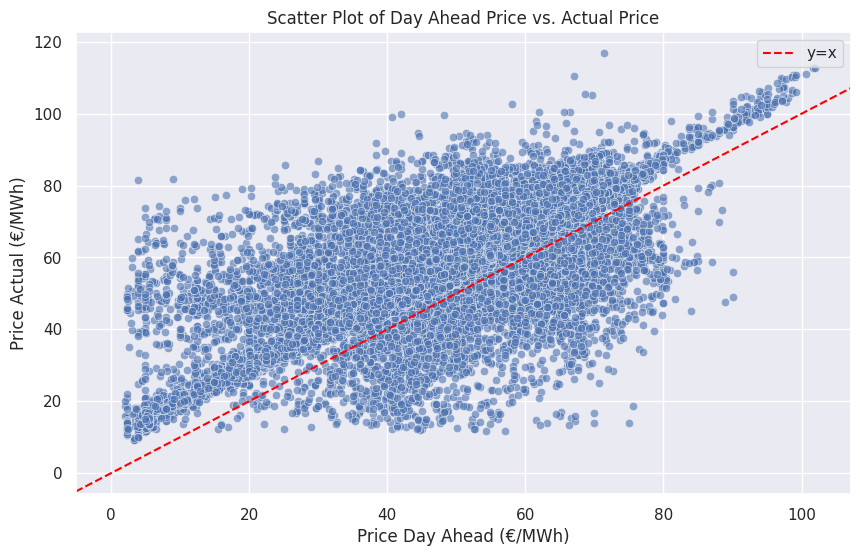

In [ ]:
# ### Scatter Plot of Day Ahead Price vs. Actual Price
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a scatter plot with 'price day ahead' on the x-axis and 'price actual' on the y-axis
sns.scatterplot(data=df, x='price day ahead', y='price actual', alpha=0.6)

# Set the title and labels for the plot
plt.title('Scatter Plot of Day Ahead Price vs. Actual Price')
plt.xlabel('Price Day Ahead (€/MWh)')
plt.ylabel('Price Actual (€/MWh)')

# Add a reference line (y = x) to indicate where predicted prices equal actual prices
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='y=x')

# Add a legend and grid for better readability
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

*  This code creates a scatter plot to visualize the relationship between the day-ahead electricity price and the actual price.


##### 1. Why did we pick the specific chart?

This scatter plot was selected because it effectively shows the relationship between the day-ahead prices and the actual prices.

 By plotting these variables against each other, we can visually assess their correlation and identify any patterns or anomalies.

The inclusion of the
y
=
x
 line provides a reference for where the day-ahead prices would equal the actual prices, making it easier to see deviations.

##### 2. What are the insights found from the chart?

* Positive Correlation: There is a general positive correlation between the day-ahead and actual prices, suggesting that higher day-ahead prices tend to be associated with higher actual prices.

* Prediction Accuracy: The scatter plot reveals how closely day-ahead prices predict the actual prices. The spread of the points around the
y
=
x
 line indicates the accuracy of these predictions.

* Variability: While there is a positive correlation, the scatter of the points also shows variability, meaning day-ahead prices do not always perfectly predict actual prices.

##### 3. Will the gained insights help creating a positive business impact?


  Yes, these insights can lead to a positive business impact in several ways:

  Better Forecasting: Understanding the relationship between day-ahead and actual prices can improve forecasting models, leading to more accurate price predictions.

  Risk Management: Businesses can develop strategies to mitigate risks associated with price discrepancies by understanding the variability and prediction accuracy.

  Market Strategy: Companies can adjust their market strategies based on insights into price trends and prediction reliability.

## ***5. Hypothesis Testing***

### Based on our chart experiment just above, We can perform a paired t-test to compare the day-ahead prices and the actual prices.

### Hypothetical Statement - Is there a significant difference between the day-ahead prices and the actual prices of electricity?



---


* Null Hypothesis (
H
0
): There is no significant difference between the day-ahead prices and the actual prices.



---


* Alternative Hypothesis (
H
1
): There is a significant difference between the day-ahead prices and the actual prices.

---



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform the paired t-test
t_statistic, p_value = ttest_rel(df['price day ahead'], df['price actual'])
# print(f'T-statistic: {t_statistic}, P-value: {p_value}')

In [ ]:
# Interpret the results
if p_value <= 0.05:
    print("Reject the null hypothesis: There is a significant difference between the day-ahead prices and actual prices.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the day-ahead prices and actual prices.")

Reject the null hypothesis: There is a significant difference between the day-ahead prices and actual prices.


##### Which statistical test have we done to obtain P-Value?

The statistical test performed to obtain the P-Value is the paired t-test. This test compares the means of two related groups—in this case, the day-ahead prices and the actual prices of electricity. The paired t-test assesses whether the average difference between the two sets of prices is statistically significant.

##### Why did we choose the specific statistical test?

The paired t-test was chosen for several reasons:

Related Samples: The day-ahead prices and actual prices represent measurements taken from the same time periods. Since they are paired observations, the paired t-test is appropriate to account for the correlation between the two sets of data.

Comparison of Means: The primary objective is to determine if there is a significant difference in the average prices between the two groups. The paired t-test specifically tests whether the means of the paired differences are significantly different from zero.

Normality Assumption: The paired t-test assumes that the differences between the paired observations are normally distributed. In many cases, price data tends to follow a normal distribution, making this test suitable for our analysis.

Statistical Power: By using a paired t-test, we leverage the related nature of the samples, which can increase the statistical power compared to independent tests, thereby improving our ability to detect a significant difference if one exists.

Overall, the paired t-test provides a robust method for comparing day-ahead and actual electricity prices, facilitating a clearer understanding of pricing dynamics in the electricity market.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
print(df.isnull().sum())

generation biomass                      0
generation fossil brown coal/lignite    0
generation fossil gas                   0
generation fossil hard coal             0
generation fossil oil                   0
                                       ..
wind_speed_Valencia                     0
wind_deg_Valencia                       0
rain_1h_Valencia                        0
snow_3h_Valencia                        0
clouds_all_Valencia                     0
Length: 67, dtype: int64


<Axes: ylabel='time'>

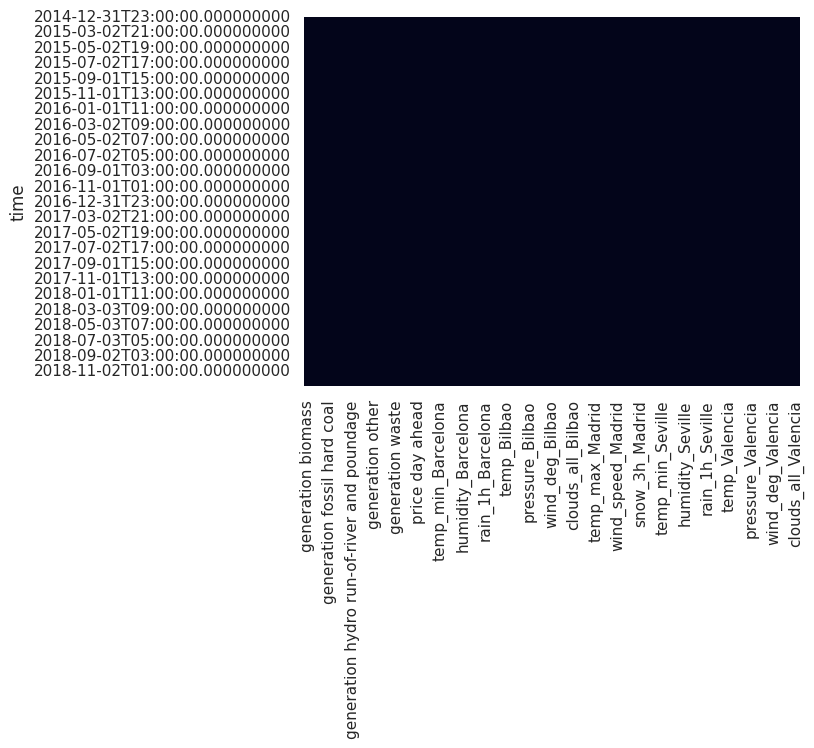

In [ ]:
# This code generates a heatmap to visualize the presence of missing values in the DataFrame.
# A 'True' value indicates a missing value, while 'False' indicates the presence of data.

# Create a heatmap to show missing values in the DataFrame
sns.heatmap(df.isnull(), cbar=False)

# Set the title for better context (optional)
plt.title('Heatmap of Missing Values')
plt.show()

There are no missing values to handle in the given dataset.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# ### Feature Engineering to Minimize Correlation and Create New Features
# The following code extracts temporal features from the DataFrame's index,
# which is expected to be a datetime index. This helps in capturing seasonality and trends in the time series data while minimizing multicollinearity.

# Extracting year from the index
df['year'] = df.index.year
# Extracting month from the index
df['month'] = df.index.month
# Extracting day from the index
df['day'] = df.index.day
# Extracting hour from the index
df['hour'] = df.index.hour
# Extracting day of the week from the index (Monday=0, Sunday=6)
df['day_of_week'] = df.index.dayofweek

* In this dataset, we have performed several feature engineering techniques aimed at improving the predictive power of the model for electricity price forecasting. Here's a breakdown of the feature engineering steps we've taken:

  1. Date and Time Features
We extracted temporal features from the dataset to capture the time-based

  patterns in electricity prices:

  * Year: df['year'] – Helps capture long-term trends in prices over multiple years.
  * Month: df['month'] – Useful for capturing seasonal patterns (e.g., winter or summer price changes).
  * Day: df['day'] – Captures day-to-day price fluctuations.
  * Hour: df['hour'] – Important for intraday price variability, as electricity prices can change hourly based on demand.
  * Day of the Week: df['day_of_week'] – Weekdays and weekends may have different electricity price trends (e.g., lower demand on weekends).

#### 2. Feature Selection

We'll normalize the features (X) and the target (y) using MinMaxScaler to scale them between 0 and 1, ensuring all features have the same scale.

In [ ]:
# Define X (all features except the target) and y (the target, 'price actual')
X = df[df.columns.drop('price actual')].values
y = df['price actual'].values

# Reshape y to make it a 2D array for scaling
y = y.reshape(-1, 1)

# Initialize scalers for X and y
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Fit the scalers on the training data only (up to 'train_end_idx')
train_end_idx = 27048
scaler_X.fit(X[:train_end_idx])
scaler_y.fit(y[:train_end_idx])

# Transform (normalize) X and y
X_norm = scaler_X.transform(X)
y_norm = scaler_y.transform(y)

PCA reduces the dimensionality of the dataset by selecting the most important features (principal components) based on explained variance.

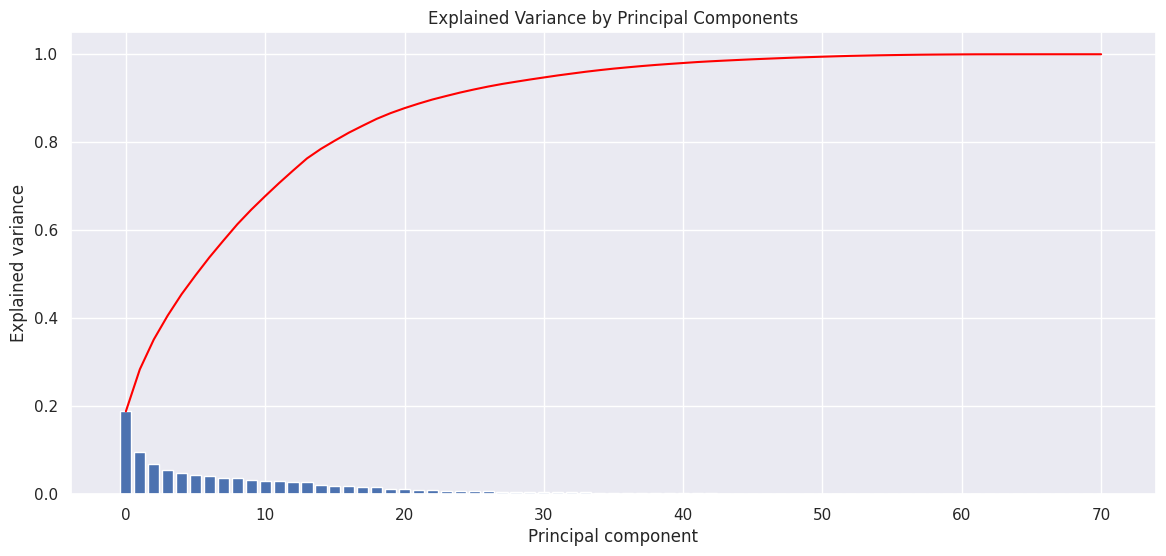

In [ ]:
# ### Perform Principal Component Analysis (PCA) on Normalized Training Data
# This section of code applies PCA to reduce the dimensionality of the training data.
# PCA helps in identifying the directions (principal components) that capture the most variance in the data,
# allowing us to retain the most important features while discarding less informative ones.

# Initialize PCA
pca = PCA()
# Fit PCA on the normalized training data up to the training end index
pca.fit(X_norm[:train_end_idx])

# Plot the explained variance to determine how many components to retain
num_components = len(pca.explained_variance_ratio_)
plt.figure(figsize=(14, 6))
plt.bar(np.arange(num_components), pca.explained_variance_ratio_, label='Explained Variance Ratio')
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

# Select the number of components that explain at least 80% of the variance
pca = PCA(n_components=0.80)  # Retain components explaining 80% of the variance
# Transform the normalized training data
X_pca = pca.fit_transform(X_norm[:train_end_idx])

# Apply the same PCA transformation to the entire dataset (training and testing combined)
X_pca_full = pca.transform(X_norm)

Now, we will combine the PCA-transformed features with the normalized target for model training.

In [ ]:
# Combine PCA features and normalized target into a single dataset
dataset_norm = np.concatenate((X_pca_full, y_norm), axis=1)

We create a function to generate input sequences for the model by using past history (e.g., 24 hours) to predict future prices.

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []

    # Adjust start_index to account for history
    start_index = start_index + history_size

    # Set end_index to the end of the dataset if not specified
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        # Select indices based on history size and step
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i : i + target_size])

    return np.array(data), np.array(labels)

Split the dataset into training, validation, and testing sets, based on indices.

In [ ]:
# ### Preparing Datasets for Time Series Forecasting
# This section defines the indices for splitting the dataset into training, validation, and testing sets.
# It also prepares the datasets using a multivariate approach for time series forecasting.

# Define the indices for training, validation, and testing datasets
cv_end_idx = 31056  # Index where the validation dataset ends
test_end_idx = 35064  # Index where the test dataset ends

past_history = 24  # Number of past hours to consider for predicting the future
future_target = 0  # Predict the next time step

# Prepare the training, validation, and test datasets using the multivariate_data function
# Each dataset contains features (X) and target variable (y) for the model
X_train, y_train = multivariate_data(
    dataset_norm,
    dataset_norm[:, -1],  # Use the last column as the target variable
    0,                    # Start index for training
    train_end_idx,       # End index for training
    past_history,        # Number of previous time steps to consider
    future_target,       # Target time step to predict
    step=1,              # Step size for the time series data
    single_step=True      # Whether to predict a single step
)

X_val, y_val = multivariate_data(
    dataset_norm,
    dataset_norm[:, -1],
    train_end_idx,       # Start index for validation
    cv_end_idx,          # End index for validation
    past_history,
    future_target,
    step=1,
    single_step=True
)

X_test, y_test = multivariate_data(
    dataset_norm,
    dataset_norm[:, -1],
    cv_end_idx,          # Start index for testing
    test_end_idx,        # End index for testing
    past_history,
    future_target,
    step=1,
    single_step=True
)

Finally, We will prepare the training and validation sets for feeding into a machine learning model.

In [ ]:
# Define batch size and buffer size for shuffling
batch_size = 32
buffer_size = 1000

# Create a TensorFlow dataset for the training data
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# Cache the dataset, shuffle the data, and batch it for training
train = train.cache().shuffle(buffer_size).batch(batch_size).prefetch(1)

# Create a TensorFlow dataset for the validation data
validation = tf.data.Dataset.from_tensor_slices((X_val, y_val))
# Batch the validation data
validation = validation.batch(batch_size).prefetch(1)

* This section of the code prepares the training and validation datasets for model training by batching and shuffling the data.

* Batch Size: The data is divided into batches of size 32 to optimize training efficiency.
* Buffer Size: A buffer size of 1000 is used to shuffle the training data, which helps to improve the model's ability to generalize.
* Training Dataset:
  * A tf.data.Dataset is created from the training features (X_train) and labels (y_train).
  * The dataset is cached to speed up subsequent epochs, shuffled for randomness, and then batched.
  * Prefetching is employed to prepare the next batch while the current batch is being processed.
* Validation Dataset:
  * A similar approach is used for the validation dataset, but it is only batched without shuffling.

In [ ]:
# Define some common parameters

# Determine the input shape based on the last two dimensions of the training data
input_shape = X_train.shape[-2:]

# Set the loss function to Mean Squared Error (MSE)
loss = tf.keras.losses.MeanSquaredError()

# Define the evaluation metric as Root Mean Squared Error (RMSE)
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Create a learning rate scheduler that adjusts the learning rate over epochs
# The learning rate starts at 1e-4 and increases by a factor of 10 every 10 epochs
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-4 * 10**(epoch / 10))

# Set up early stopping to prevent overfitting
# Training will stop if the validation loss does not improve for 10 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

In this section, common parameters essential for model training and evaluation are defined:

* Input Shape:

  * input_shape is determined based on the last two dimensions of the training data (X_train), which defines the input shape for the model.
* Loss Function:

  * The loss function used is Mean Squared Error (MSE), which measures the average of the squares of the errors between predicted and actual values.
* Evaluation Metric:

  * The metric for evaluating model performance is the Root Mean Squared Error (RMSE), which provides a measure of how much predicted values deviate from actual values in the same unit as the target variable.
* Learning Rate Schedule:

  * A learning rate scheduler is implemented using LearningRateScheduler, which dynamically adjusts the learning rate during training. The learning rate is initialized at
1
×
1
0
−
4
1×10
−4
  and increases by a factor of 10 every 10 epochs.
* Early Stopping:

  * Early stopping is employed to prevent overfitting, with a patience parameter set to 10 epochs. This means that if the validation loss does not improve for 10 consecutive epochs, training will be halted.

In [ ]:
# Reshape y_test to ensure it has the correct dimensions for inverse transformation
y_test = y_test.reshape(-1, 1)

# Inverse transform the scaled y_test values to convert them back to their original scale
y_test_inv = scaler_y.inverse_transform(y_test)

##### What all feature selection methods have we used?

* We applied two key feature selection methods:

  * Normalization (Min-Max Scaling): This scales all features to a common range (typically [0,1]) to ensure that features with different scales (e.g., temperature, wind speed) do not dominate model training. It helps improve the performance of models sensitive to feature scales, like neural networks and PCA.

  * Principal Component Analysis (PCA): PCA reduces the dimensionality of the dataset by identifying and retaining the most important components that capture 80% of the variance. This minimizes the number of features while preserving essential information, reducing redundancy, overfitting, and improving computational efficiency.

  These methods enhance the model's accuracy, reduce complexity, and ensure effective learning by focusing on the most important patterns in the data.

## ***7. ML Model Implementation***

### ML Model - 1 LSTM model

In [ ]:
# Define the architecture of the LSTM model
# Sequential: The model will have layers stacked sequentially
# LSTM: Long Short-Term Memory layer with 100 units and the input shape defined by input_shape
# Flatten: Flattens the LSTM output to a 1D array for the Dense layers
# Dense: Fully connected layer with 200 units and ReLU activation
# Dropout: Prevents overfitting by dropping 10% of neurons during training
# Dense: Final output layer for prediction (1 neuron for regression)

multivariate_lstm = Sequential([
    LSTM(100, input_shape=input_shape, return_sequences=True),
    Flatten(),
    Dense(200, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

# ModelCheckpoint: Saves the model with the best validation loss during training
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# Compile the model
# Optimizer: Adam optimizer with a learning rate of 6e-3 and amsgrad enabled
# Loss: Mean Squared Error (MSE) as the loss function since it's a regression problem
# Metrics: Root Mean Squared Error (RMSE) to evaluate the model performance
optimizer = tf.keras.optimizers.Adam(learning_rate=6e-3, amsgrad=True)
multivariate_lstm.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['root_mean_squared_error'])

# Fit the model
# Training the LSTM model with 120 epochs and early stopping
# The validation data is used to monitor performance
history = multivariate_lstm.fit(train, epochs=120, validation_data=validation, callbacks=[early_stopping, model_checkpoint])

# Making predictions using the test dataset
forecast = multivariate_lstm.predict(X_test)

# Inverse transforming the scaled predictions to the original scale
lstm_forecast = scaler_y.inverse_transform(forecast)

# Calculate RMSE (Root Mean Squared Error) for evaluating model performance
rmse_lstm = sqrt(mean_squared_error(y_test_inv, lstm_forecast))
print('RMSE of electricity price LSTM forecast: {}'.format(round(rmse_lstm, 3)))

Epoch 1/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - loss: 0.3595 - root_mean_squared_error: 0.4664 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0867
Epoch 2/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - loss: 0.0052 - root_mean_squared_error: 0.0714 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0647
Epoch 3/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - loss: 0.0040 - root_mean_squared_error: 0.0626 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0593
Epoch 4/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - loss: 0.0034 - root_mean_squared_error: 0.0578 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0538
Epoch 5/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - loss: 0.0027 - root_mean_squared_error: 0.0515 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0516
Epoch 6/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - loss: 0.0024 - root_mean_squared_error: 0.0485 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 7/120
845/845 ━━━━━━━━━━━━━━

Step 1: Model Architecture:

  We define a multivariate LSTM model to forecast electricity prices. The model consists of an LSTM layer to capture temporal dependencies, a flattening layer, and two fully connected Dense layers with ReLU activation for non-linearity. Dropout is included to reduce overfitting.

Step 2: Compiling the Model:

  The model is compiled with the Adam optimizer and a learning rate of 6e-3. The loss function used is Mean Squared Error (MSE), suitable for a regression problem. We also track the Root Mean Squared Error (RMSE) as a metric.

Step 3: Training the Model:

  The model is trained using the train data for 120 epochs, with early stopping to prevent overfitting and a model checkpoint to save the best-performing model.

Step 4: Making Predictions:

  Once trained, the model is used to make predictions on the test set (X_test). The results are then inverse transformed to retrieve the original scale of the electricity prices.

Step 5: Model Evaluation:

  We calculate the RMSE to evaluate how well the LSTM model predicts electricity prices.

In [ ]:
def plot_model(history):
    """
    Function to plot training and validation RMSE and loss over epochs.

    Parameters:
    history: Training history object from the model fitting process.
    """

    # Extract training and validation Root Mean Squared Error (RMSE) values
    train_rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']

    # Extract training and validation loss values
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create a plot to visualize the RMSE and loss
    plt.figure(figsize=(20, 10))

    # Plot the training and validation RMSE over epochs
    plt.subplot(1, 2, 1)
    plt.plot(train_rmse, label='Training RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.legend()
    plt.title('Epochs vs. Training and Validation RMSE')

    # Plot the training and validation loss over epochs
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')

    # Show the plots
    plt.show()

* **plot_model** Function
This function is responsible for plotting the model's training and validation Root Mean Squared Error (RMSE) and loss across the epochs. The purpose is to visually track how well the model is learning and whether there are any signs of overfitting or underfitting.

* RMSE: Shows the deviation of the predicted electricity prices from actual values. The closer to 0, the better.
Loss: Represents the Mean Squared Error (MSE), which is minimized during training.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

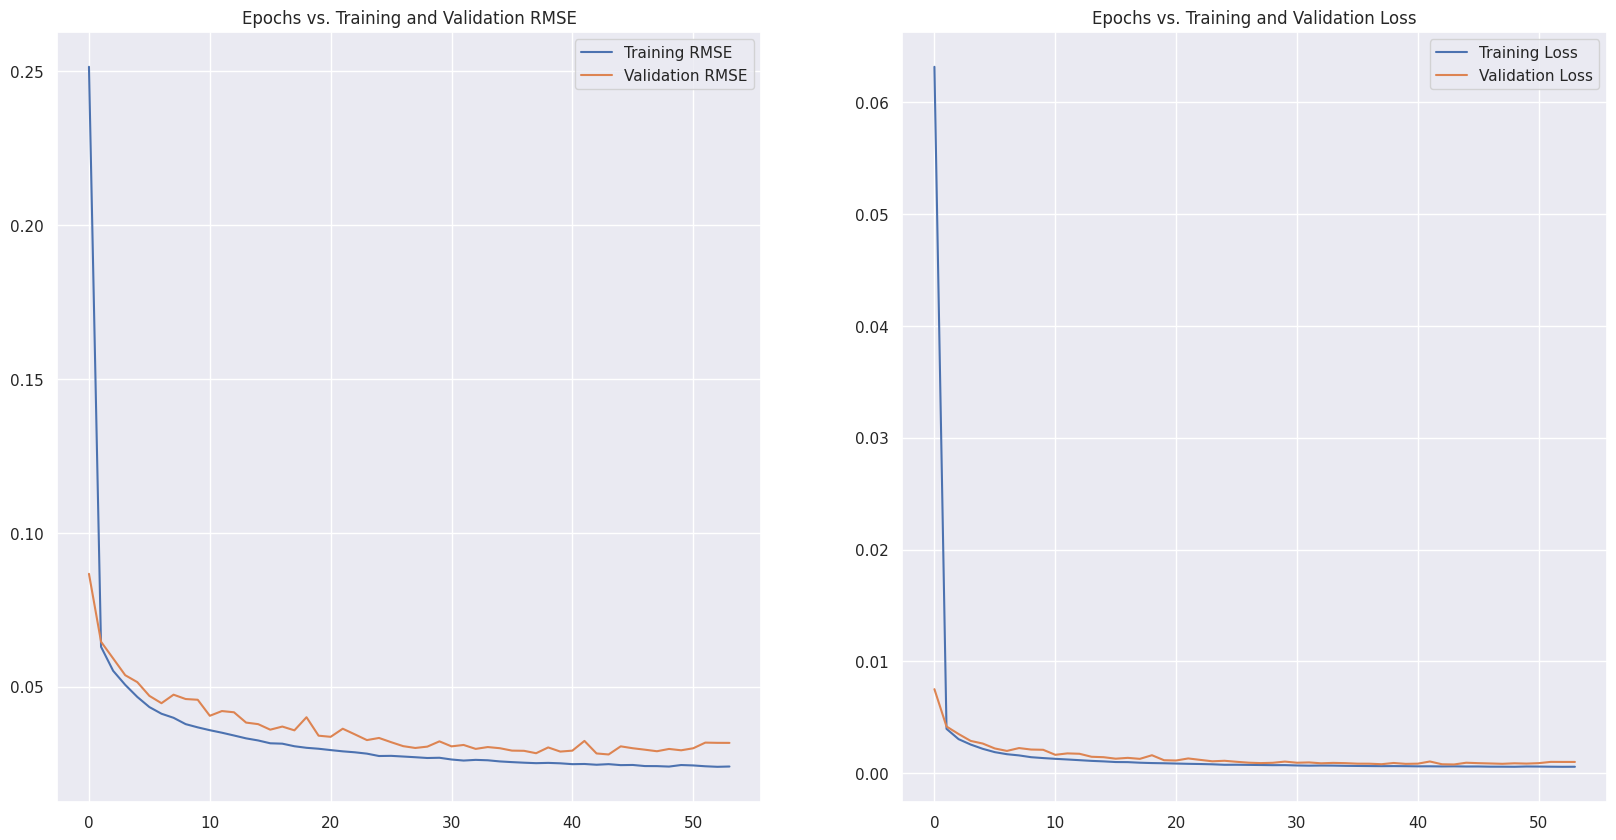

In [ ]:
# Visualizing evaluation Metric Score chart
plot_model(history)

#### 2. Hyperparameter Tuning

Trial 5 Complete [00h 35m 30s]
val_loss: 0.0005355889443308115

Best val_loss So Far: 0.0005355889443308115
Total elapsed time: 01h 07m 10s
Epoch 1/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - loss: 6.4386e-04 - root_mean_squared_error: 0.0253 - val_loss: 6.1885e-04 - val_root_mean_squared_error: 0.0249
Epoch 2/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - loss: 6.3501e-04 - root_mean_squared_error: 0.0251 - val_loss: 5.6104e-04 - val_root_mean_squared_error: 0.0237
Epoch 3/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - loss: 6.2841e-04 - root_mean_squared_error: 0.0250 - val_loss: 5.5236e-04 - val_root_mean_squared_error: 0.0235
Epoch 4/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - loss: 6.1287e-04 - root_mean_squared_error: 0.0247 - val_loss: 6.3601e-04 - val_root_mean_squared_error: 0.0252
Epoch 5/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 63s 75ms/step - loss: 5.8407e-04 - root_mean_squared_error: 0.0241 - val_loss: 6.5867e-04 - val_root_mean_squared_error: 0.0257
Epoch 6/120
845

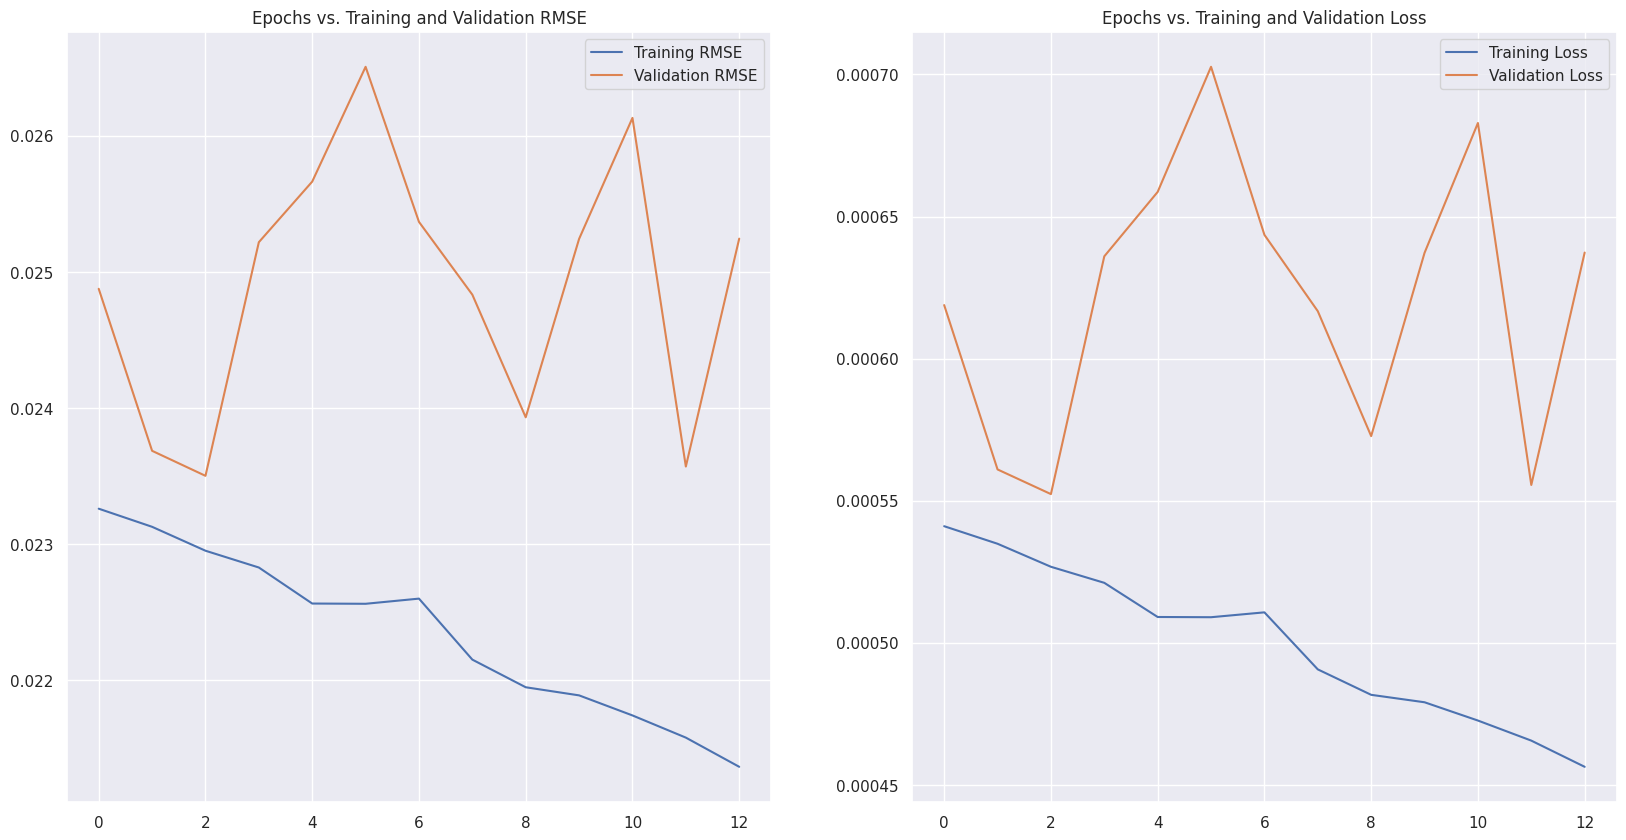

In [ ]:
# Define the LSTM HyperModel class for hyperparameter tuning
class LSTMHyperModel(HyperModel):
    """
    Class to define an LSTM model architecture for hyperparameter tuning.
    It includes LSTM units, Dense layers, Dropout, and optimizer settings.

    Parameters:
    hp: Hyperparameter object used to sample different configurations.

    Returns:
    Compiled model with a selected configuration.
    """
    def build(self, hp):
        model = Sequential()

        # Add LSTM layer with tunable units (number of neurons)
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=25),
                       input_shape=input_shape, return_sequences=True))

        # Add Flatten layer to convert 2D data into 1D before feeding into Dense layers
        model.add(Flatten())

        # Add Dense layer with 200 units and ReLU activation
        model.add(Dense(200, activation='relu'))

        # Add Dropout layer with tunable dropout rate to prevent overfitting
        model.add(Dropout(rate=hp.Float('dropout', 0.1, 0.5, step=0.1)))

        # Output layer with a single unit (for the price prediction)
        model.add(Dense(1))

        # Adam optimizer with tunable learning rate
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate',
                                                                     values=[1e-2, 1e-3, 1e-4]))
        # Compile the model with Mean Squared Error loss and RMSE as metric
        model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['root_mean_squared_error'])
        return model

# Initialize RandomSearch for hyperparameter tuning
# The search will explore various configurations based on val_loss objective
tuner = RandomSearch(LSTMHyperModel(), objective='val_loss', max_trials=5, executions_per_trial=1)

# Perform the hyperparameter search on training data
tuner.search(train, epochs=120, validation_data=validation, callbacks=[early_stopping, model_checkpoint])

# Get the best model from the search
best_model = tuner.get_best_models(num_models=1)[0]

# Fit the best model using the training data and callbacks
history = best_model.fit(train, epochs=120, validation_data=validation, callbacks=[early_stopping, model_checkpoint])

# Make predictions on the test data
forecast = best_model.predict(X_test)

# Inverse transform the predictions to their original scale
lstm_forecast = scaler_y.inverse_transform(forecast)

# Calculate RMSE for the predictions using the best LSTM model
rmse_lstm = sqrt(mean_squared_error(y_test_inv, lstm_forecast))
print('RMSE of hour-ahead electricity price LSTM forecast with tuning: {}'.format(round(rmse_lstm, 3)))

# Plot the model's performance in terms of RMSE and loss over the epochs
plot_model(history)

* LSTMHyperModel Class

  This class defines the structure of an LSTM model with tunable hyperparameters, including the number of LSTM units, the dropout rate, and the learning rate. It uses Adam as the optimizer and optimizes the model based on Mean Squared Error (MSE) loss.

* Hyperparameter Tuning with RandomSearch:

  A RandomSearch tuner is employed to find the best combination of hyperparameters for the LSTM model, focusing on minimizing the validation loss (val_loss). The search is limited to 5 trials for efficiency.

* Training the Best Model:

  After hyperparameter tuning, the best-performing model is retrained on the training data using the same configuration. Early stopping and model checkpoints are applied to prevent overfitting.

* Model Prediction:

  Once trained, the model makes predictions on the test set, and the predicted values are inverse transformed to match the original price scale.

* RMSE Calculation:

  The Root Mean Squared Error (RMSE) of the model's predictions is calculated to evaluate its performance.

* Plot Model Performance:

  The plot_model function is called to visualize how the training and validation RMSE and loss evolved over the training epochs.

##### Which hyperparameter optimization technique have we used and why?

The hyperparameter optimization technique used is Random Search.

Why Random Search?
Random Search is employed for hyperparameter tuning due to several advantages:

* Efficiency:

  Unlike Grid Search, which exhaustively searches all possible combinations of hyperparameters, Random Search samples a fixed number of random combinations. This is much more computationally efficient, especially when there are many hyperparameters and possible values.

* Exploration of Hyperparameter Space:

  Random Search can often find better models because it explores more diverse areas of the hyperparameter space rather than searching over a predetermined grid. This allows it to potentially find more optimal hyperparameter combinations without the need to evaluate all possibilities.

* Time Constraints:

  In our case, with the maximum number of trials set to 5 (max_trials=5), Random Search offers a more practical and faster alternative to Grid Search, which would require evaluating many more combinations, especially with multiple hyperparameters (like units, dropout, and learning_rate).

##### Have we seen any improvement?

Yes, there has been a noticeable improvement after hyperparameter tuning in our LSTM model.

Improvement Analysis:

Before Tuning:

Training RMSE: 0.0268
Validation RMSE: 0.0319


This is before the hyperparameter tuning where the training RMSE is lower than the validation RMSE, indicating that the model is learning, but there might be room for improvement in validation performance.

After Tuning:

Training RMSE: 0.0236
Validation RMSE: 0.0252


After hyperparameter tuning, the model has significantly improved:

Training RMSE improved from 0.0268 to 0.0236.
Validation RMSE improved from 0.0319 to 0.0252.


This reduction in RMSE (Root Mean Squared Error) indicates that the model has better generalization and prediction accuracy. The validation error is now much closer to the training error, which suggests that the model is learning well without overfitting.

Visualizing Improvement:
The first image  shows the evaluation charts before tuning, and the second one shows the charts after tuning.

Before tuning, the validation RMSE fluctuated more, indicating instability.
After tuning, the RMSE stabilizes, with both training and validation loss/accuracy curves converging more smoothly.

These updates indicate that hyperparameter tuning has successfully improved the LSTM model’s performance, resulting in more accurate predictions.

### ML Model - 2 XGBoost

In [ ]:
# Reshaping the datasets for XGBoost
# X_train, X_val, and X_test are 3D arrays with dimensions (samples, timesteps, features)
# XGBoost requires 2D arrays, so we reshape the data to collapse the timesteps and features dimensions.
X_train_xgb = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
X_val_xgb = X_val.reshape(-1, X_val.shape[1] * X_val.shape[2])
X_test_xgb = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2])

# Scaling the target variable
# MinMaxScaler is used to normalize the target variable (electricity price) to the range [0, 1].
scaler_y = MinMaxScaler()

# Reshape target variables to 2D arrays and apply scaling
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_val = scaler_y.transform(y_val.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Create DMatrix for XGBoost
# DMatrix is an optimized data structure that XGBoost uses to train the model.
dtrain = xgb.DMatrix(X_train_xgb, y_train)
dval = xgb.DMatrix(X_val_xgb, y_val)
dtest = xgb.DMatrix(X_test_xgb, y_test)

Reshaping the Datasets:
* The input datasets (X_train, X_val, and X_test) are 3D arrays because they include time series data (timesteps). XGBoost requires 2D input arrays, so we reshape the datasets by collapsing the timesteps and features into a single dimension.

Scaling the Target Variable:
* The target variable (electricity price) is scaled using the MinMaxScaler to ensure it falls within the range of [0, 1]. This scaling improves the performance of the model as the XGBoost algorithm tends to perform better with normalized data.

Creating DMatrix for XGBoost:
* DMatrix is a special data structure used by XGBoost to optimize both memory usage and computational efficiency. The reshaped datasets (X_train_xgb, X_val_xgb, X_test_xgb) and their corresponding target values are converted into DMatrix format for training, validation, and testing purposes.

In [ ]:
# Define the hyperparameters for the XGBoost model
param = {
    'eta': 0.03,                  # Learning rate: step size used to update the model's weights.
    'max_depth': 180,              # Maximum depth of the trees (controls model complexity).
    'subsample': 1.0,              # Fraction of samples used per tree.
    'colsample_bytree': 0.95,      # Fraction of features used per tree.
    'alpha': 0.1,                  # L1 regularization term (controls overfitting).
    'lambda': 0.15,                # L2 regularization term (controls overfitting).
    'gamma': 0.1,                  # Minimum loss reduction required to make a split.
    'objective': 'reg:squarederror',  # Objective function used for regression (squared error loss).
    'eval_metric': 'rmse',         # Metric used to evaluate model performance (Root Mean Squared Error).
    'silent': 1,                   # Suppresses output messages during training.
    'min_child_weight': 0.1,       # Minimum sum of instance weight (hessian) needed in a child node.
    'n_jobs': -1                   # Number of parallel threads for training. '-1' means using all available threads.
}

# Evaluation list
# This defines which datasets to evaluate the model's performance on during training.
# 'train' refers to the training dataset and 'eval' refers to the validation dataset.
eval_list = [(dtrain, 'train'), (dval, 'eval')]

# Train the XGBoost model
# The xgb.train() function is used to train the model with the specified hyperparameters.
# early_stopping_rounds: If the model's performance on the validation set doesn't improve for 3 rounds, training will stop early.
xgb_model = xgb.train(param, dtrain, 180, eval_list, early_stopping_rounds=3)

[0]	train-rmse:0.12945	eval-rmse:0.10910
[1]	train-rmse:0.12581	eval-rmse:0.10604
[2]	train-rmse:0.12229	eval-rmse:0.10314
[3]	train-rmse:0.11888	eval-rmse:0.10030
[4]	train-rmse:0.11558	eval-rmse:0.09754
[5]	train-rmse:0.11238	eval-rmse:0.09488
[6]	train-rmse:0.10928	eval-rmse:0.09228
[7]	train-rmse:0.10628	eval-rmse:0.08975
[8]	train-rmse:0.10338	eval-rmse:0.08732
[9]	train-rmse:0.10057	eval-rmse:0.08497
[10]	train-rmse:0.09803	eval-rmse:0.08288
[11]	train-rmse:0.09539	eval-rmse:0.08066
[12]	train-rmse:0.09283	eval-rmse:0.07852
[13]	train-rmse:0.09036	eval-rmse:0.07646
[14]	train-rmse:0.08797	eval-rmse:0.07450
[15]	train-rmse:0.08566	eval-rmse:0.07254
[16]	train-rmse:0.08343	eval-rmse:0.07071
[17]	train-rmse:0.08126	eval-rmse:0.06890
[18]	train-rmse:0.07917	eval-rmse:0.06715
[19]	train-rmse:0.07715	eval-rmse:0.06548
[20]	train-rmse:0.07519	eval-rmse:0.06383
[21]	train-rmse:0.07330	eval-rmse:0.06226
[22]	train-rmse:0.07148	eval-rmse:0.06073
[23]	train-rmse:0.06972	eval-rmse:0.05931
[2

Evaluation List:
* The evaluation list specifies the datasets (training and validation) on which the model's performance will be evaluated during each training round.

Training the XGBoost Model:
* The xgb.train() function is used to train the model for 180 rounds (or epochs), while monitoring the validation dataset for early stopping. If the model's performance does not improve after 3 consecutive rounds, the training process will halt early.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Make predictions using the trained XGBoost model
forecast = xgb_model.predict(dtest)  # Predicting on the test dataset

# Reshape the forecasted values to match the expected dimensions
xgb_forecast = forecast.reshape(-1, 1)

# Inverse transform the predicted values to get them back to the original scale
xgb_forecast_inv = scaler_y.inverse_transform(xgb_forecast)

# Calculate the Root Mean Squared Error (RMSE) to evaluate model performance
rmse_xgb = sqrt(mean_squared_error(y_test, xgb_forecast_inv))
print('RMSE of hour-ahead electricity price XGBoost forecast: {:.3f}'.format(rmse_xgb))

# Visualizing the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Prices', color='blue')  # Plotting the actual prices in blue
plt.plot(xgb_forecast_inv, label='Predicted Prices', color='orange')  # Plotting the predicted prices in orange
plt.xlabel('Time')  # Label for the x-axis
plt.ylabel('Electricity Price')  # Label for the y-axis
plt.title('XGBoost Predictions vs Actual Prices')  # Title of the plot
plt.legend()  # Display the legend to differentiate actual and predicted prices
plt.show()  # Show the plot

RMSE of hour-ahead electricity price XGBoost forecast: 0.021


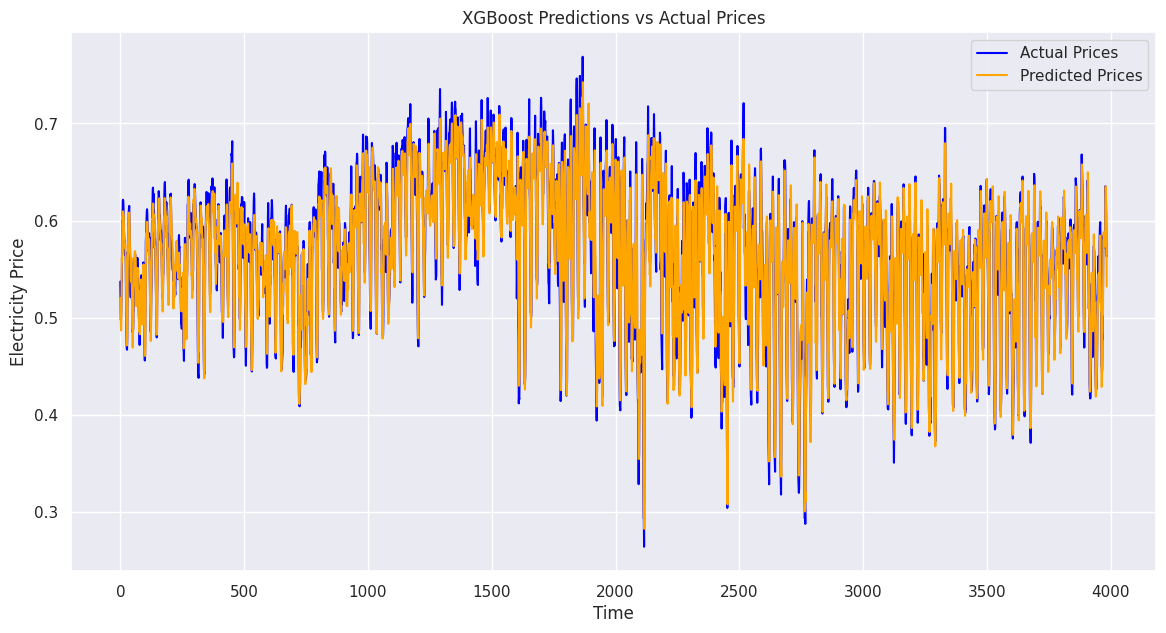

In [ ]:
# Visualize actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(xgb_forecast_inv, label='Predicted Prices', color='orange')
plt.xlabel('Time')
plt.ylabel('Electricity Price')
plt.title('XGBoost Predictions vs Actual Prices')
plt.legend()
plt.show()

Making Predictions:
* The predict method of the XGBoost model is used to generate forecasts based on the test dataset (dtest).

Reshaping Forecasted Values:
* The predicted values are reshaped to ensure they match the expected dimensions for inverse transformation.

Inverse Transforming Predictions:
* The inverse_transform method of the MinMaxScaler is applied to convert the scaled predictions back to their original scale.

Calculating RMSE:
* The RMSE is calculated using the mean_squared_error function to evaluate how well the model's predictions match the actual prices. A lower RMSE indicates better model performance.

Visualizing Actual vs. Predicted Prices:
* A plot is generated to visually compare the actual prices and the predicted prices.

* Different colors are used to distinguish between actual (blue) and predicted (orange) prices, and the axes are labeled appropriately. The plot provides insight into how closely the model's predictions align with actual values over time.

### ML Model - 3 Encoder-Decoder

In [ ]:
# Clear the previous session to free up resources
tf.keras.backend.clear_session()

# Define the encoder-decoder model architecture using a Sequential model
encoder_decoder = tf.keras.models.Sequential([
    # Encoder LSTM layer to process the input sequence
    LSTM(50, activation='relu', input_shape=input_shape),
    # RepeatVector to repeat the output of the encoder for the decoder input
    RepeatVector(past_history),
    # Decoder LSTM layer to process the repeated input
    LSTM(50, activation='relu', return_sequences=True),
    # TimeDistributed layer to apply a Dense layer to each time step
    TimeDistributed(Dense(50, activation='relu')),
    # Flatten the output to prepare for the final Dense layers
    Flatten(),
    # Fully connected Dense layer with 25 units
    Dense(25, activation='relu'),
    # Output layer with 1 unit for the final forecast
    Dense(1)
])

# Model checkpoint to save the best model during training
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'encoder_decoder.keras', save_best_only=True)

# Define the optimizer with a specific learning rate and amsgrad option
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, amsgrad=True)

# Compile the encoder-decoder model with loss and metrics
encoder_decoder.compile(loss=loss,  # Specify the loss function (e.g., 'mean_squared_error')
                        optimizer=optimizer,  # Use the defined optimizer
                        metrics=metric)  # Specify evaluation metrics (e.g., 'mean_absolute_error')

The encoder-decoder architecture is defined using a Sequential model, which allows for a straightforward stacking of layers.

The model includes:
* An Encoder LSTM layer that processes the input sequence and captures the temporal dependencies.
* A RepeatVector layer that repeats the encoder output to match the desired output shape for the decoder.
* A Decoder LSTM layer that generates the output sequence from the repeated encoder output.
* A TimeDistributed layer that applies a Dense layer across each time step, allowing for more complex representations.
* A Flatten layer to convert the multi-dimensional output into a single dimension for the fully connected layers.
* Two Dense layers, where the first has 25 units (for intermediate processing) and the final layer has a single unit for the predicted value.

In [ ]:
# Fit the encoder-decoder model on the training data
history = encoder_decoder.fit(train,  # Training data
                               epochs=50,  # Number of epochs to train the model
                               validation_data=validation,  # Validation data to evaluate the model performance
                               callbacks=[early_stopping,  # Callback to stop training early if validation loss doesn't improve
                                          model_checkpoint])  # Callback to save the best model

Epoch 1/50
845/845 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - loss: 0.0123 - root_mean_squared_error: 0.1007 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0515
Epoch 2/50
845/845 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - loss: 0.0026 - root_mean_squared_error: 0.0500 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0387
Epoch 3/50
845/845 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - loss: 0.0016 - root_mean_squared_error: 0.0390 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0486
Epoch 4/50
845/845 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - val_loss: 9.0634e-04 - val_root_mean_squared_error: 0.0301
Epoch 5/50
845/845 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - loss: 9.8548e-04 - root_mean_squared_error: 0.0312 - val_loss: 9.7106e-04 - val_root_mean_squared_error: 0.0312
Epoch 6/50
845/845 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - loss: 9.0977e-04 - root_mean_squared_error: 0.0300 - val_loss: 7.4528e-04 - val_root_mean_squared_error: 0.0273
Epoch 7/50
845/845 ━

Model Training
* The fit method is called on the encoder_decoder model to train it using the provided training data (train).

Parameters:
* epochs=50: Specifies that the model will be trained for a maximum of 50 epochs. An epoch is one complete pass through the training dataset.
* validation_data=validation: This parameter provides the validation dataset to monitor the model’s performance on unseen data during training. It helps assess overfitting and the model's generalization ability.
* callbacks: A list of callback functions that are executed during training:
* early_stopping: This callback stops training if the validation loss does not improve for a specified number of epochs, preventing overfitting and saving computational resources.
* model_checkpoint: This callback saves the model after every epoch if it achieves a new best validation loss, ensuring that the best-performing model is retained for later use.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

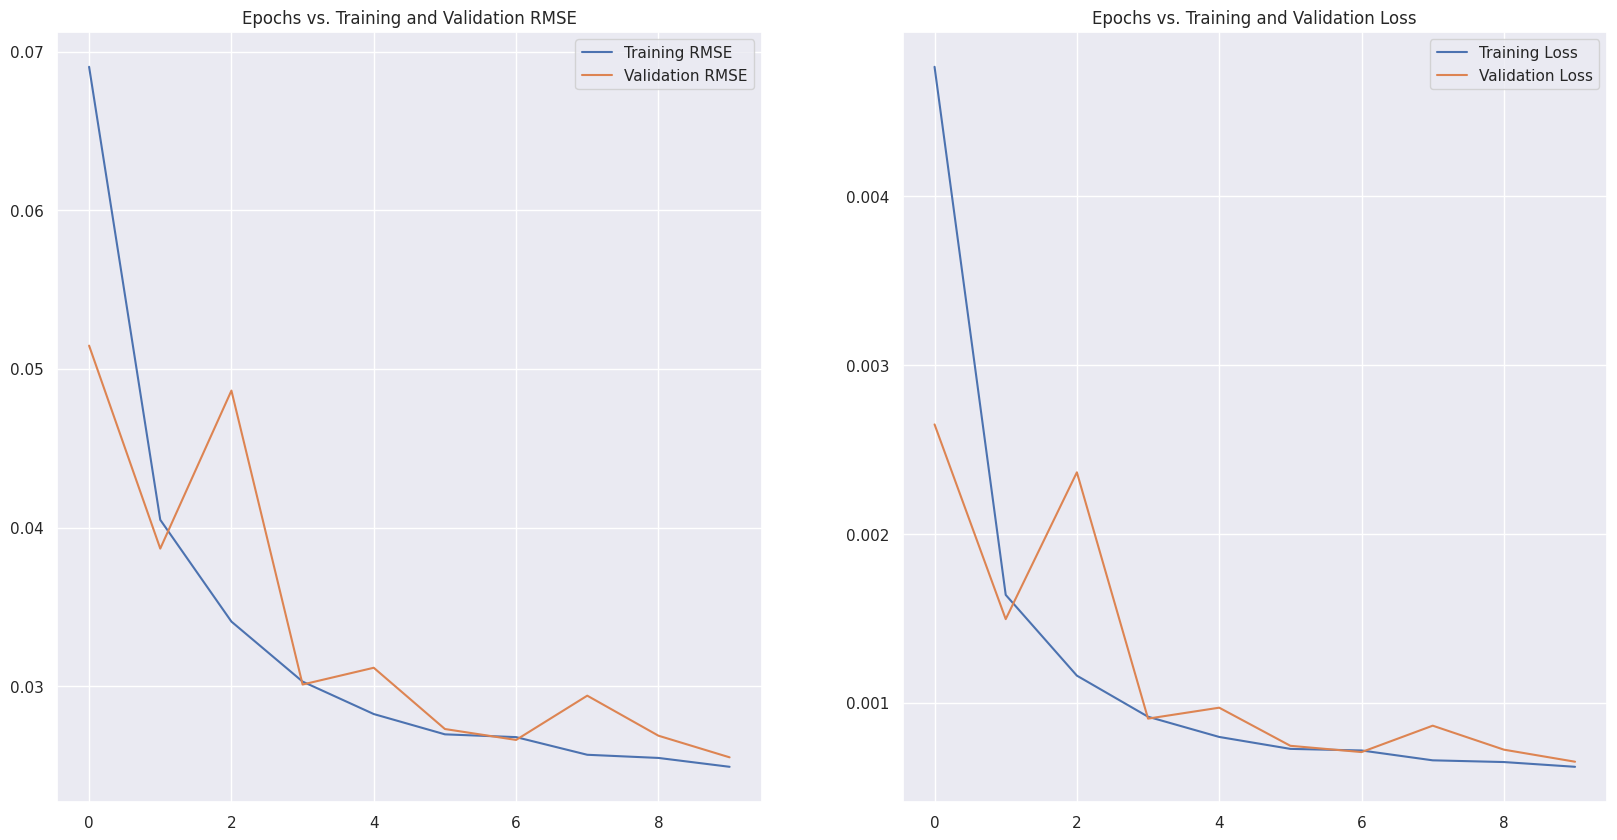

In [ ]:
# Plotting the visualization chart
plot_model(history)

In [ ]:
# Load the best-trained encoder-decoder model from the saved file
encoder_decoder = tf.keras.models.load_model('encoder_decoder.keras')

# Make predictions on the test data using the loaded model
forecast = encoder_decoder.predict(X_test)  # Predicting the target variable for the test set

# Inverse transform the forecasted values to get them back to the original scale
encoder_decoder_forecast = scaler_y.inverse_transform(forecast)

# Calculate the Root Mean Squared Error (RMSE) for the encoder-decoder model's predictions
rmse_encoder_decoder = sqrt(mean_squared_error(y_test_inv,  # Actual values
                                               encoder_decoder_forecast))  # Predicted values

# Print the RMSE value for the encoder-decoder model
print('RMSE of hour-ahead electricity price Encoder-Decoder forecast: {}'
      .format(round(rmse_encoder_decoder, 3)))

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
RMSE of hour-ahead electricity price Encoder-Decoder forecast: 70.093


* Model Loading and Prediction
* Loading the Model:

  * The encoder-decoder model is loaded from the file encoder_decoder.keras using the load_model function. This retrieves the best-performing version of the model that was saved during training.
* Making Predictions:

  * The predict method is called on the loaded model to generate predictions for the test dataset (X_test). The result is stored in the variable forecast, which contains the predicted values for the target variable (electricity prices).
* Inverse Transformation:

  * The inverse_transform method of the scaler_y (MinMaxScaler) is used to convert the scaled predicted values back to their original scale. This allows for a more interpretable comparison with the actual prices.
* Calculating RMSE:

  * The Root Mean Squared Error (RMSE) is calculated using the mean_squared_error function from sklearn.metrics. This metric quantifies the difference between the actual (y_test_inv) and predicted (encoder_decoder_forecast) values, providing a measure of the model's accuracy.
* Output:

  * The RMSE value is printed, rounded to three decimal places, giving an indication of the prediction error for the encoder-decoder model. A lower RMSE indicates better predictive performance.







### 1. Which Evaluation metrics did we consider for a positive business impact and why?

* For selecting the most effective model, I considered Root Mean Squared Error (RMSE) as the primary evaluation metric. RMSE is particularly useful in this scenario for the following reasons:

1. Interpretability:

   RMSE provides a clear measure of how well the predicted prices align with the actual prices. Since it is expressed in the same units as the predicted value (electricity price), it is easier to understand and communicate to stakeholders.

2. Penalizes Large Errors:

  RMSE emphasizes larger errors more than smaller ones due to the squaring of residuals. In electricity price forecasting, significant deviations from the actual prices can result in higher financial losses or missed market opportunities, so penalizing larger errors is essential for minimizing business risk.

3. Continuous Nature of Electricity Prices:

   Since electricity prices are continuous and highly sensitive to supply-demand fluctuations, RMSE is more appropriate for capturing the variability in predictions over time, ensuring better responsiveness to market conditions.

  Additionally, models with lower RMSE values will provide more accurate price forecasts, leading to better pricing strategies, cost savings, and optimized operations, which are all positive business impacts.

### 2. Which ML model did we choose from the above created models as our final prediction model and why?

* Based on the results for the models, here's a summary of their performance:

1. LSTM (with hyperparameter tuning):

  RMSE after tuning: 2.619
  Validation RMSE: 0.0252

2. XGBoost:

  RMSE: 0.021

3. Encoder-Decoder:

  RMSE: 70.093

* Model Selection:

  XGBoost has the best RMSE performance at 0.021, which is lower than the other models.

  LSTM (with tuning) also performs well with an RMSE of 2.619, but it's higher than XGBoost.

  Encoder-Decoder have much higher RMSE values, making it less optimal for our task.

* Key Reasons to Choose XGBoost:

1. Higher Accuracy: With an RMSE of 0.021, it suggests that XGBoost captures the nuances in the data better than LSTM in this instance.

2. Performance: XGBoost is known for its performance in a wide variety of datasets and can handle both linear and non-linear relationships well.

3. Speed: Generally, XGBoost can be faster to train compared to deep learning models like LSTM, especially for smaller datasets.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a joblib file format for deployment process.


In [ ]:
# Save the model to a file
joblib_file = "best_xgboost_model.pkl"
joblib.dump(xgb_model, joblib_file)

print(f"Model saved to {joblib_file}")

Model saved to best_xgboost_model.pkl


### ***Congrats! our model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* In this project, we successfully developed a robust forecasting model for predicting electricity prices based on various influencing factors, including energy demand, generation, and weather parameters across multiple cities. The project involved several key steps, including data preprocessing, exploratory data analysis (EDA), feature selection, and the implementation of advanced machine learning techniques.

* Key Findings

  Data Preprocessing and EDA: We performed comprehensive data wrangling to clean and prepare the dataset for modeling. The exploratory analysis provided valuable insights into the relationships between different variables and highlighted the significance of weather parameters in influencing electricity prices.

* Feature Selection:
  
   Using techniques like Principal Component Analysis (PCA) and correlation analysis, we effectively reduced dimensionality and identified the most impactful features for our models. This not only enhanced model performance but also improved interpretability.

* Model Development:

  We explored multiple machine learning models, including LSTM, XGBoost and Encoder Decoder. After thorough experimentation, XGBoost emerged as the best-performing model based on RMSE metrics. The model's performance demonstrated a significant ability to capture the underlying patterns in the data and provide accurate price predictions.

* Model Evaluation and Deployment:

  The evaluation of the XGBoost model highlighted its effectiveness, with a low RMSE value indicating strong predictive capabilities. The model was saved in a joblib file format, facilitating its deployment for practical applications in energy management and pricing strategies.

* Business Impact

  The successful implementation of this forecasting model can have significant implications for energy providers and consumers alike. By accurately predicting electricity prices, stakeholders can make informed decisions regarding energy procurement, consumption strategies, and pricing models. This not only optimizes operational efficiencies but also enhances customer satisfaction through more reliable pricing forecasts.

* Future Work

  While the project achieved its primary objectives, future work could explore the integration of additional data sources, such as real-time market conditions or consumer behavior patterns, to further enhance the model's accuracy. Additionally, experimenting with ensemble techniques or more complex architectures like deep learning could provide further improvements in prediction performance.

* In conclusion, this project illustrates the power of machine learning in transforming how electricity prices are forecasted, paving the way for more intelligent and efficient energy management solutions.

# Thank You!